In [ ]:
"""
author: Jiancheng Zeng
Date: Apr 28, 2023
"""

In [34]:
import pandas as pd
import os
import glob

"""
Read data from Discovery output and combined them into a accessiable data framework
"""
def Read_Discovery_csv(csv_directory):
    # Get a list of all the CSV files in the directory
    csv_files = glob.glob(os.path.join(csv_directory, '*.csv'))

    # Define the column names or indices you want to read
    columns_to_read = [0, 1]  # Replace these with the actual column names or indices

    # Create an empty list to store the data from the CSV files
    data_frames = []

    # Loop through all the CSV files and read the data
    for i, csv_file in enumerate(csv_files):
        # Read the CSV data while skipping the first 10 rows and selecting only the specified columns
        data = pd.read_csv(csv_file, skiprows=10, usecols=columns_to_read, header=None)

        # Set custom column names for the DataFrame based on the current loop iteration
        data.columns = [f'Event{i+1}_time', f'Event{i+1}_signal']

        # Add the data frame to the list of data frames
        data_frames.append(data)

    # Combine all the data frames into a single data frame by adding columns
    combined_data = pd.concat(data_frames, axis=1)

    return combined_data

csv_directory = '/home/jiancheng/GRAMS/Charge_preamp/data/Apr_2023_test_GArTPC/705.1tor_265V_100mV'
combined_data = Read_Discovery_csv(csv_directory)
print(combined_data)

      Event1_time  Event1_signal  Event2_time  Event2_signal  Event3_time  \
0       -0.005120       0.003106    -0.005119       0.003779    -0.005120   
1       -0.005119       0.000748    -0.005118       0.004790    -0.005118   
2       -0.005117       0.000075    -0.005116       0.007147    -0.005117   
3       -0.005116       0.001085    -0.005115       0.005800    -0.005116   
4       -0.005115       0.001422    -0.005114       0.009504    -0.005115   
...           ...            ...          ...            ...          ...   
8187     0.005114      -0.256541     0.005115      -0.077718     0.005114   
8188     0.005115      -0.261930     0.005116      -0.085464     0.005115   
8189     0.005116      -0.260583     0.005117      -0.075698     0.005117   
8190     0.005118      -0.259909     0.005119      -0.083780     0.005118   
8191     0.005119      -0.259236     0.005120      -0.083780     0.005119   

      Event3_signal  Event4_time  Event4_signal  Event5_time  Event5_signal

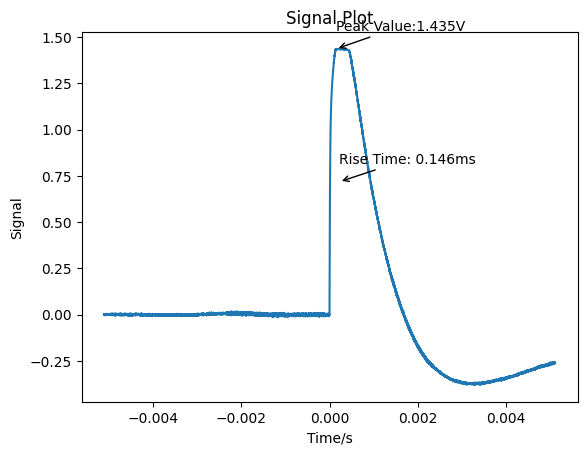

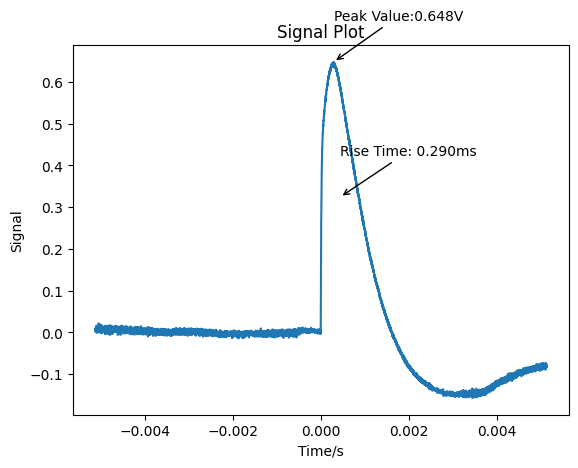

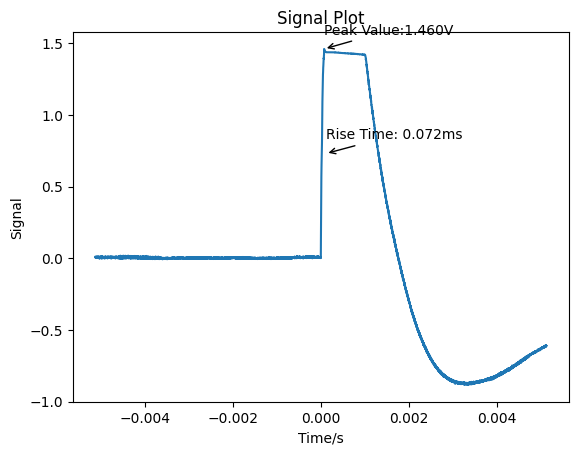

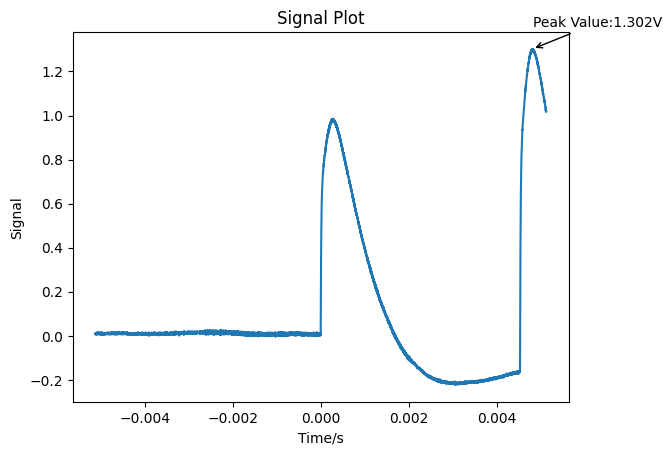

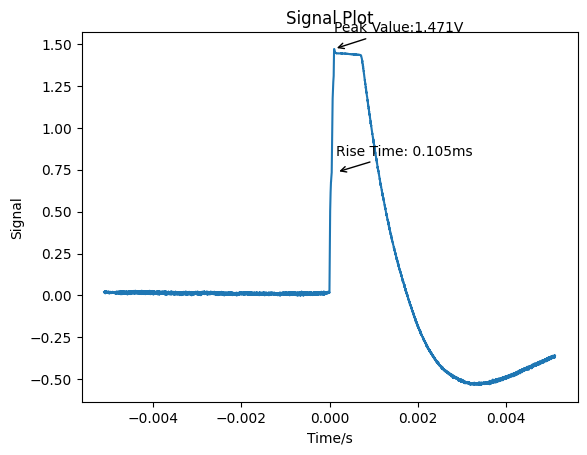

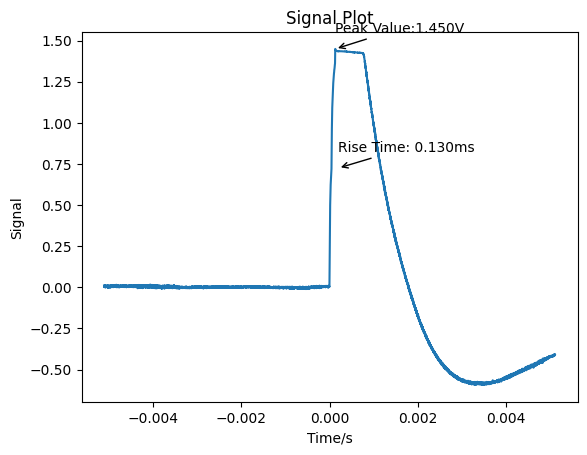

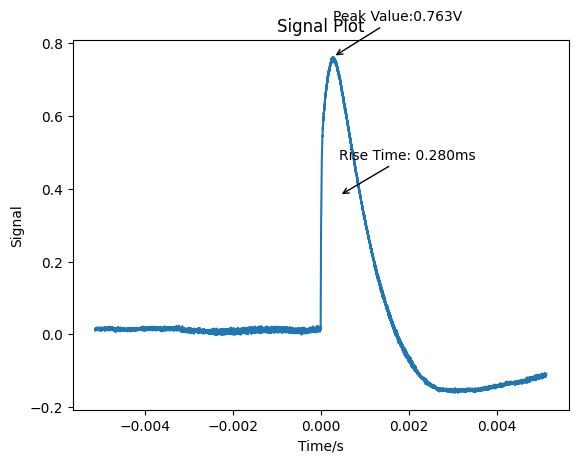

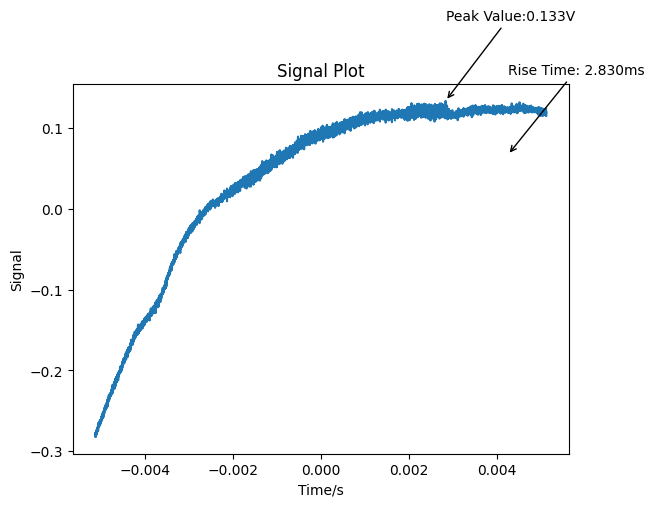

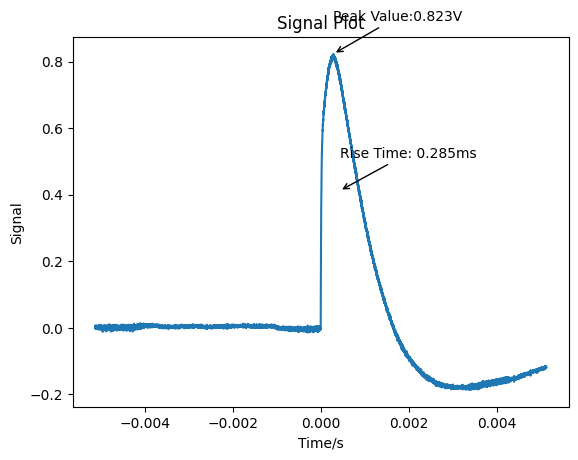

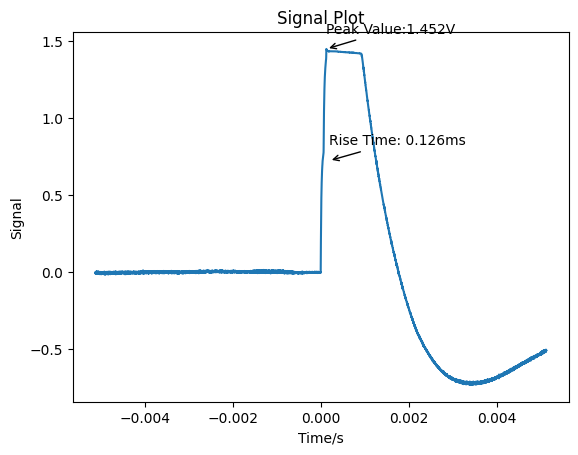

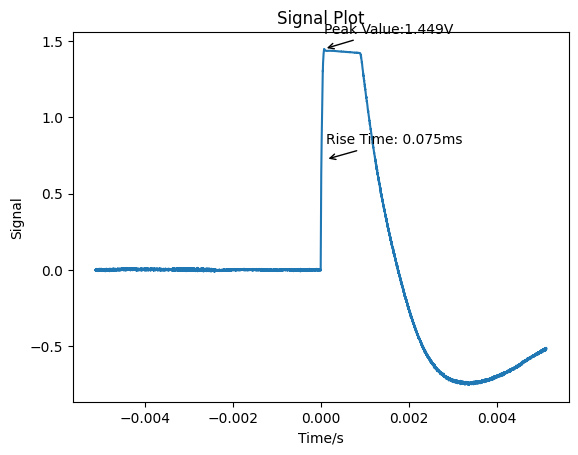

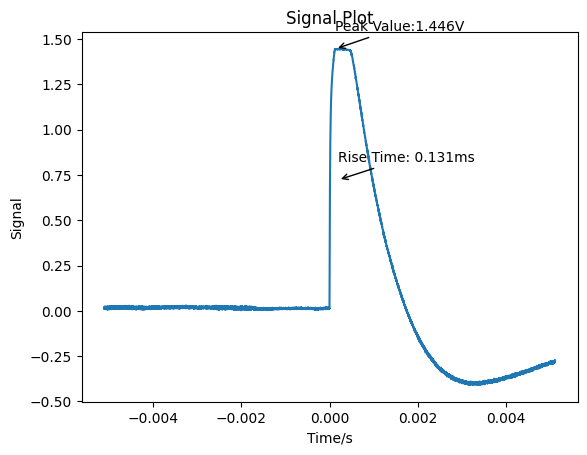

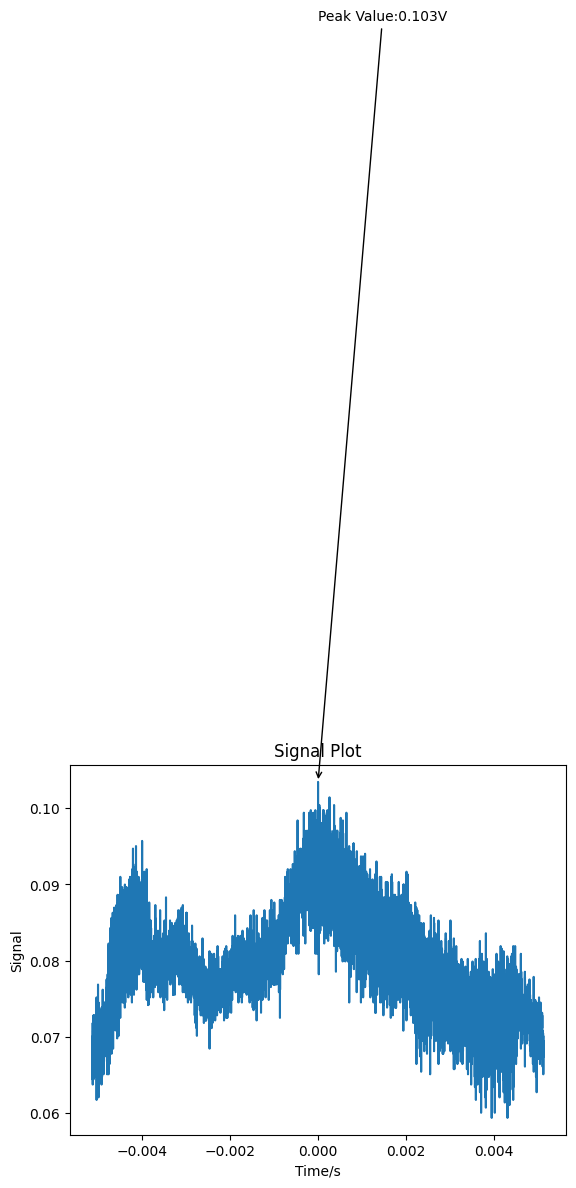

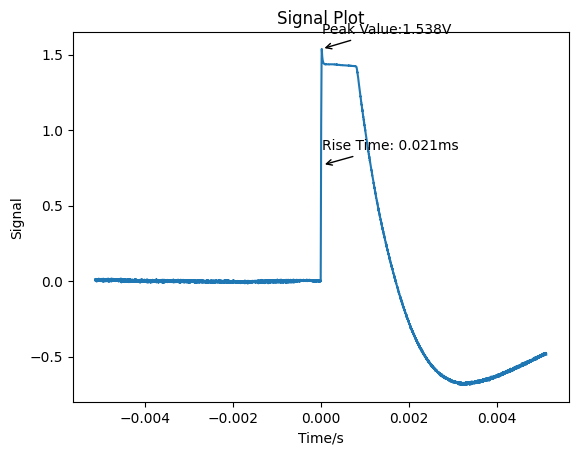

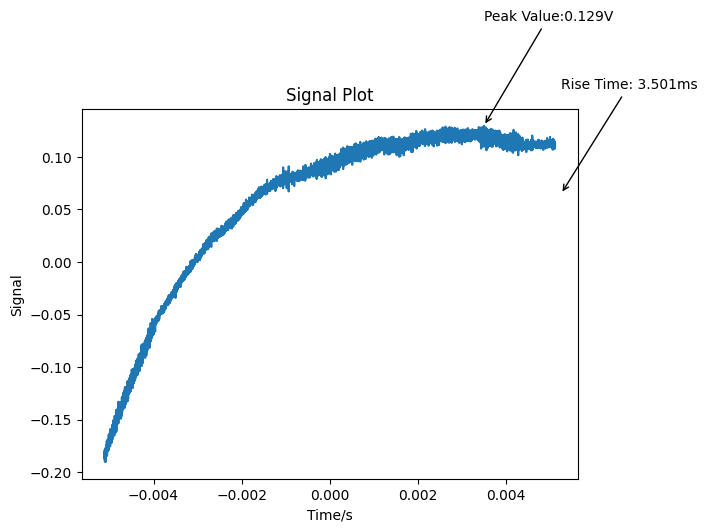

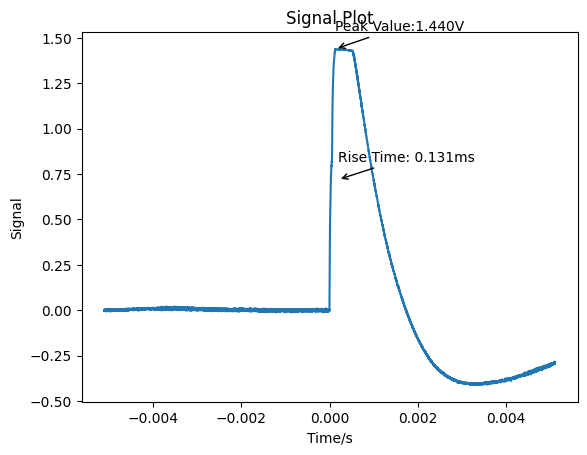

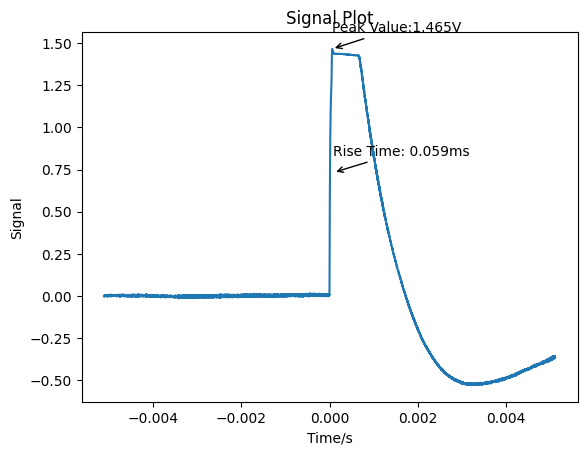

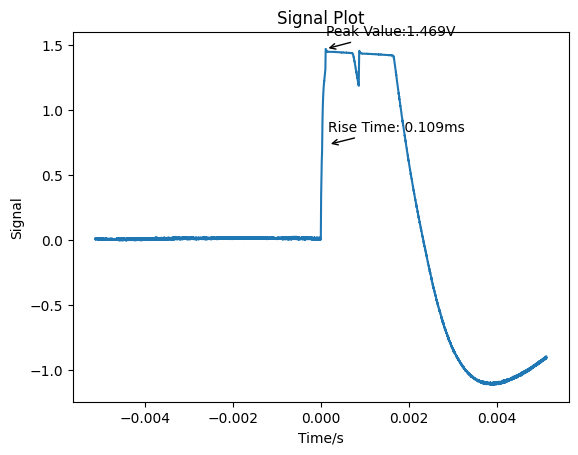

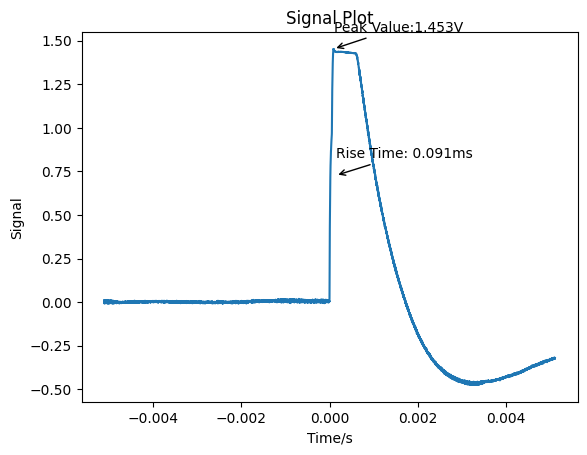

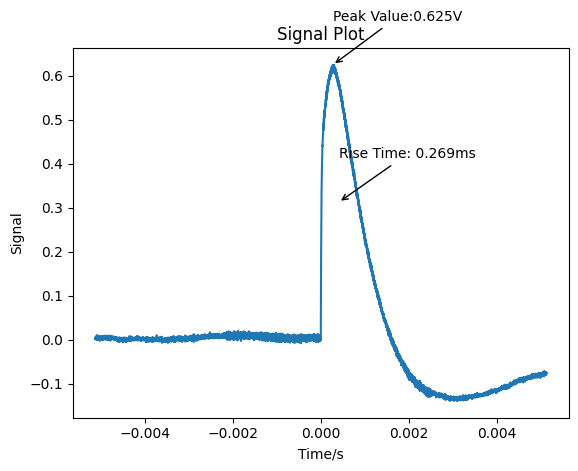

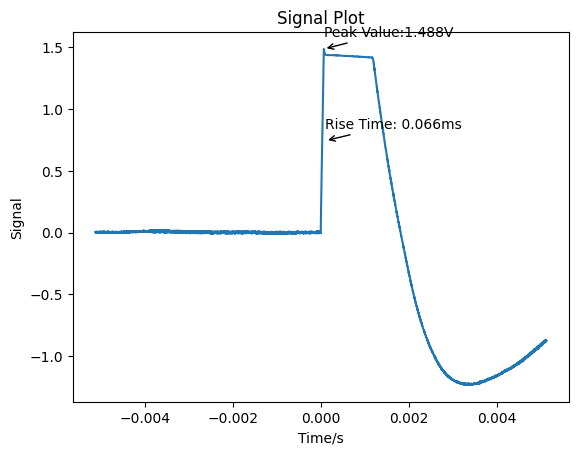

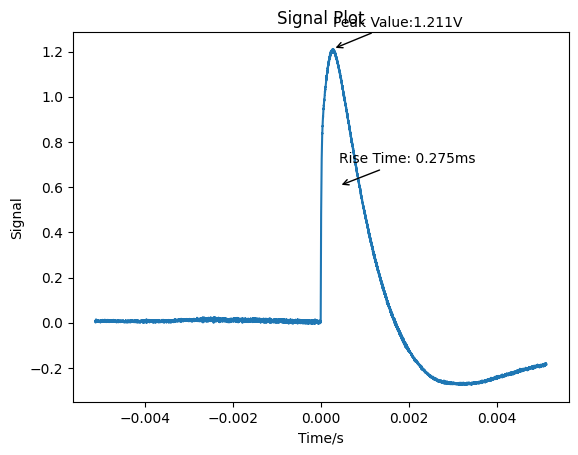

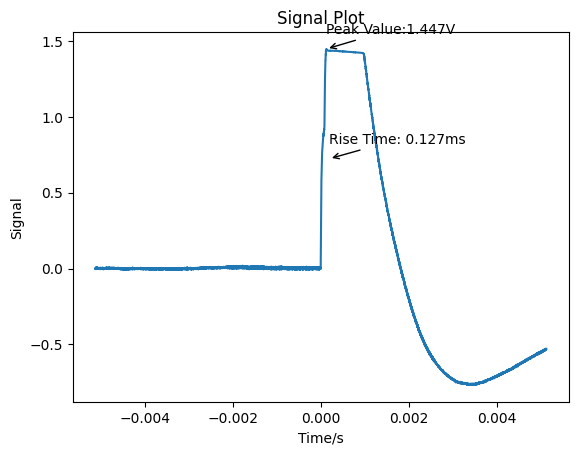

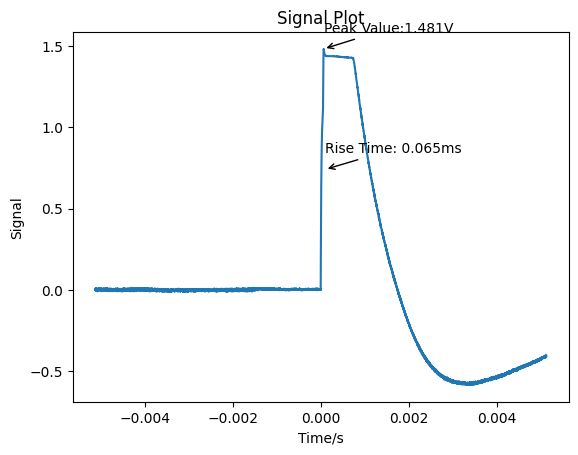

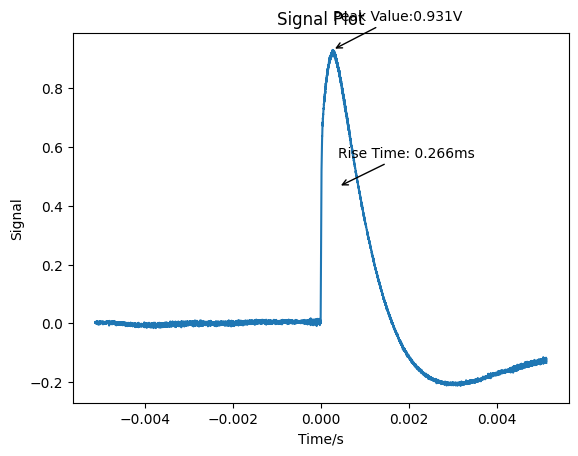

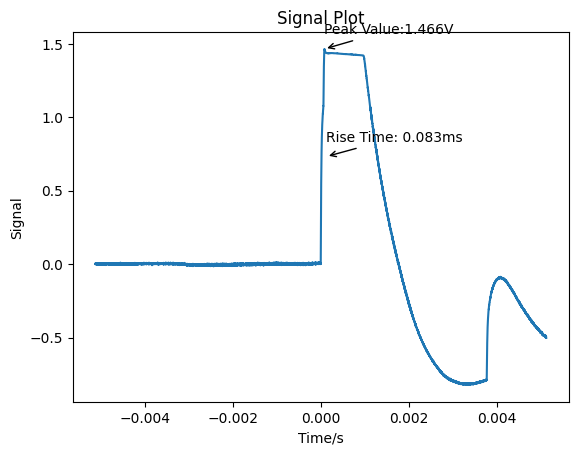

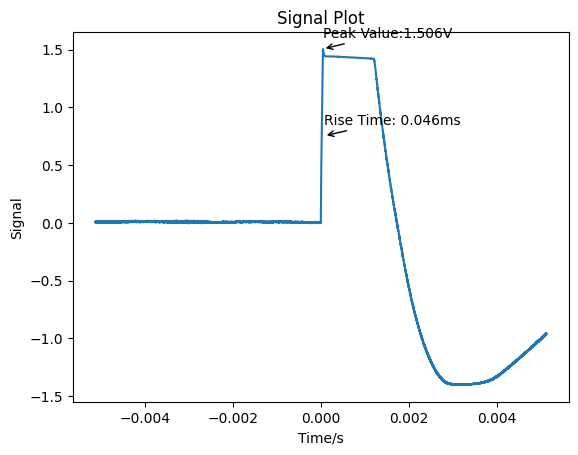

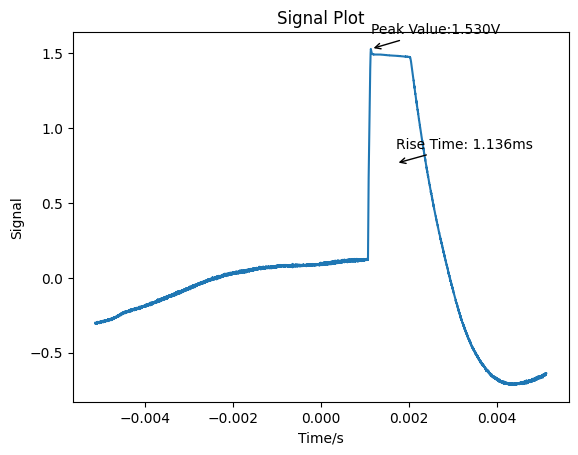

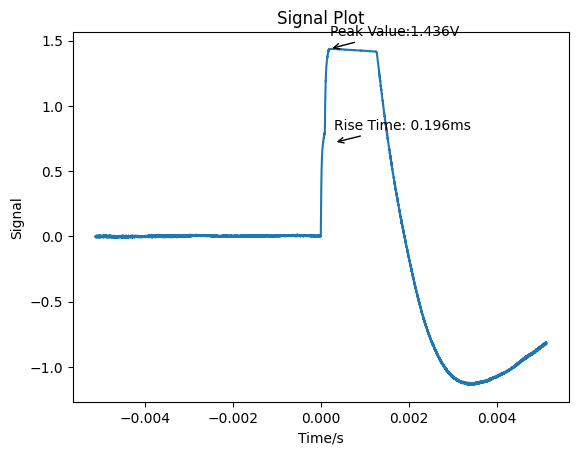

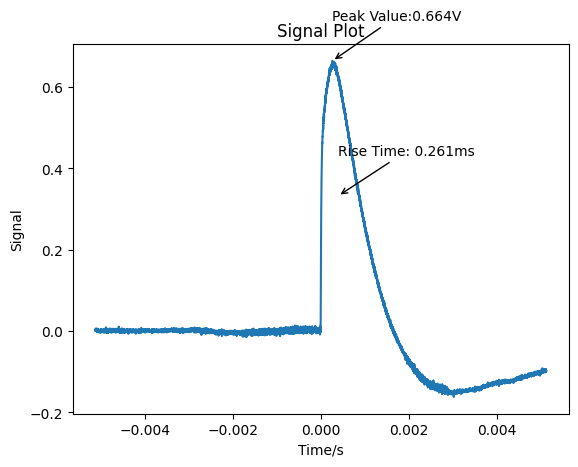

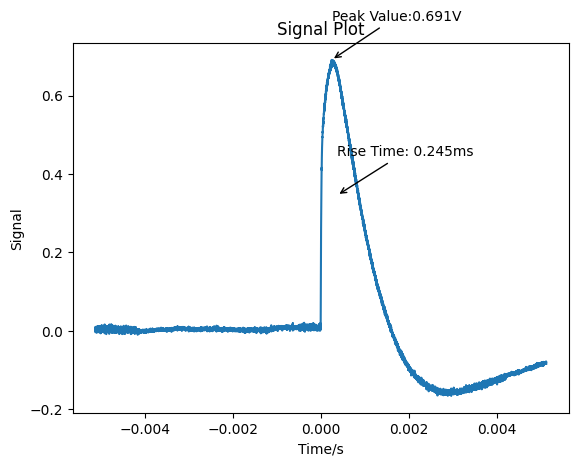

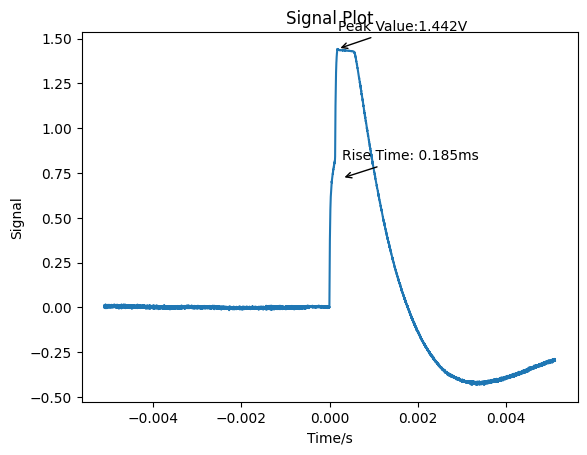

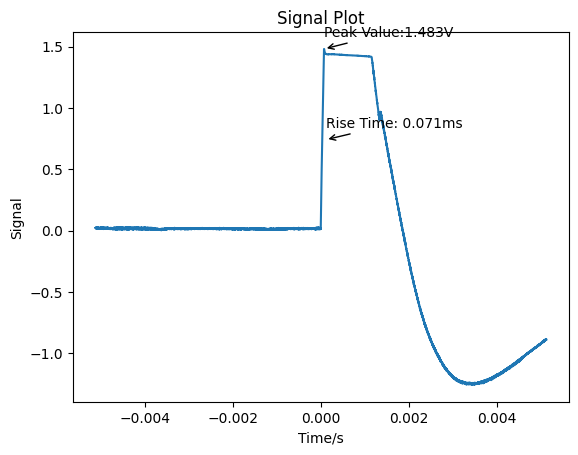

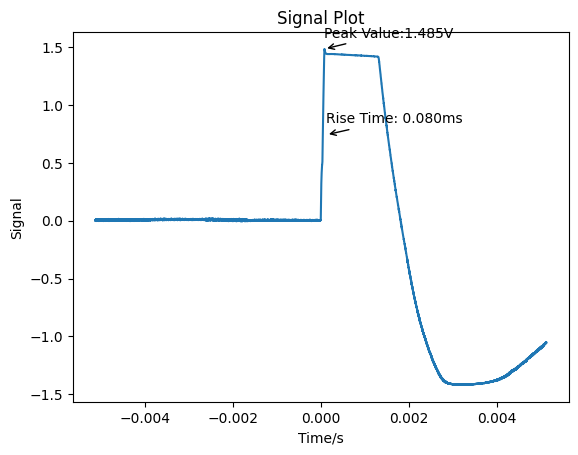

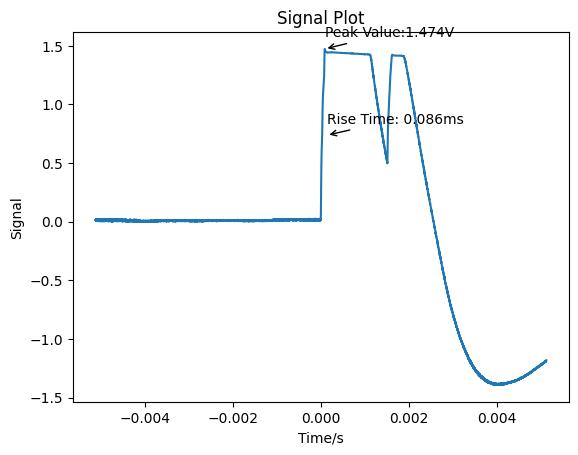

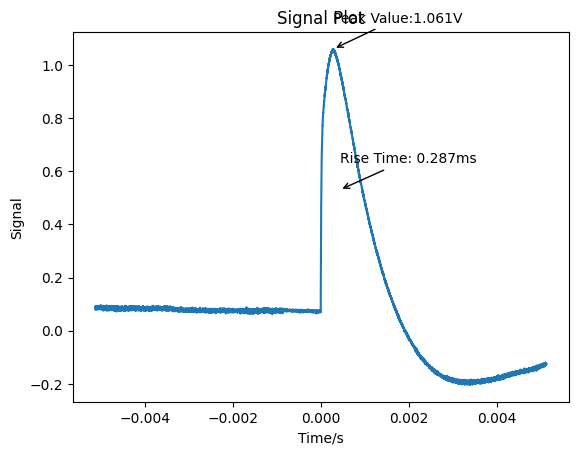

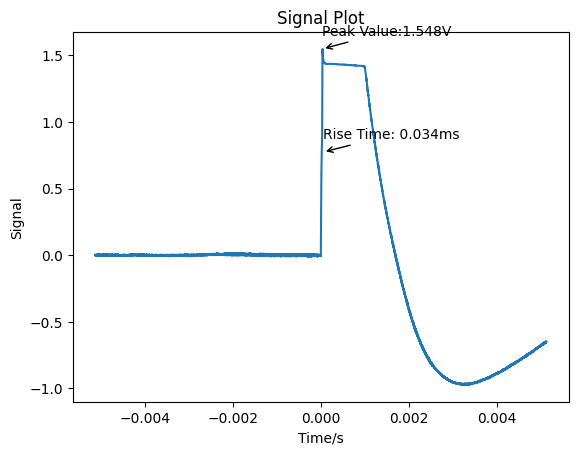

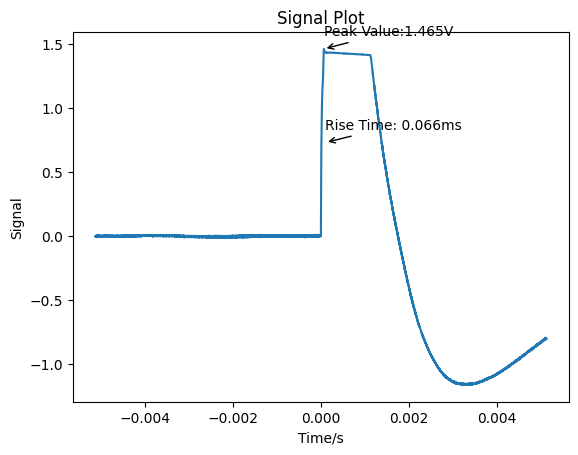

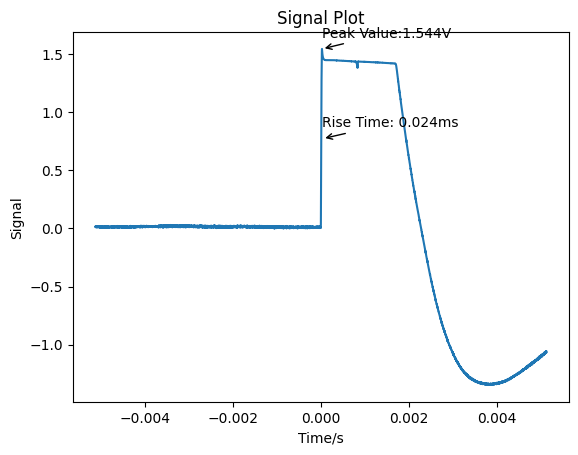

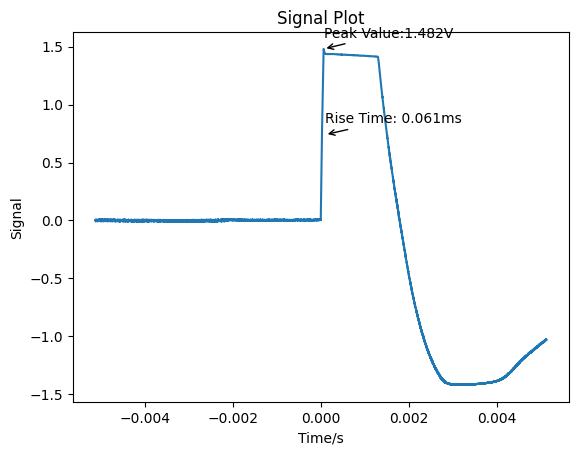

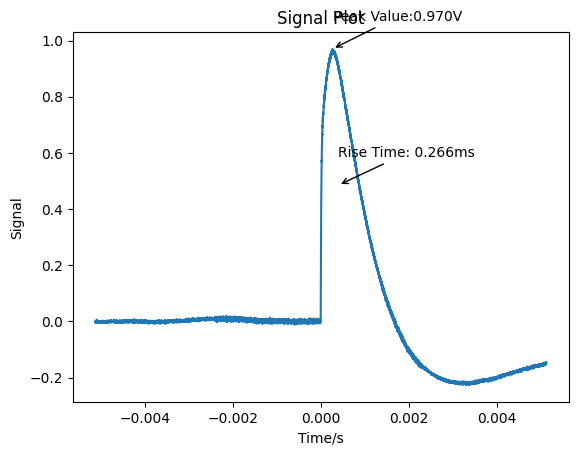

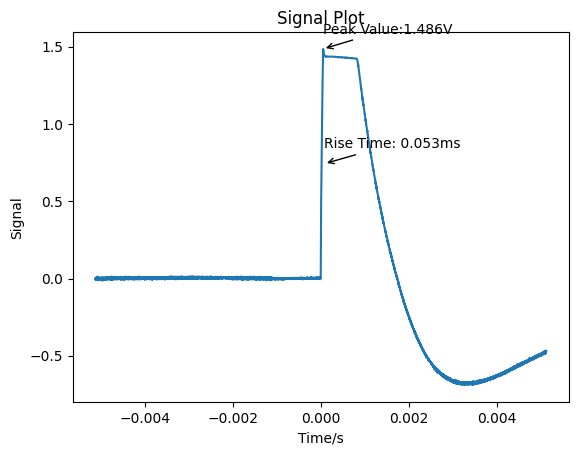

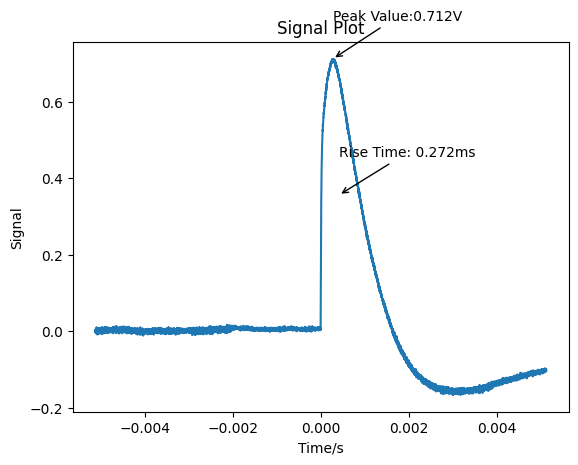

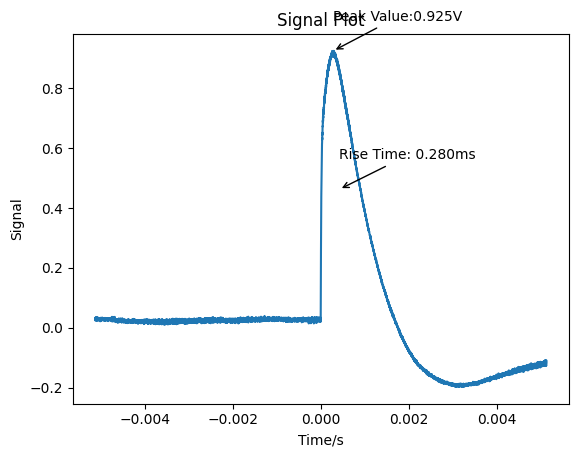

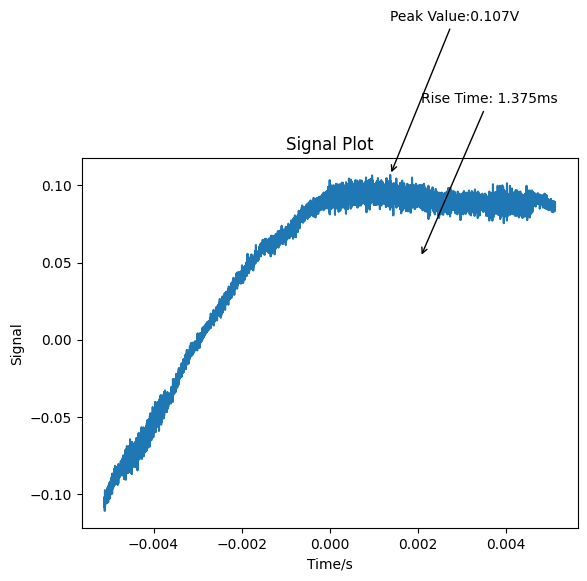

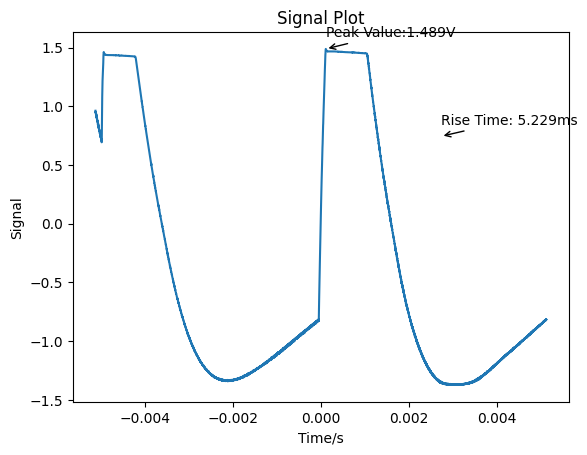

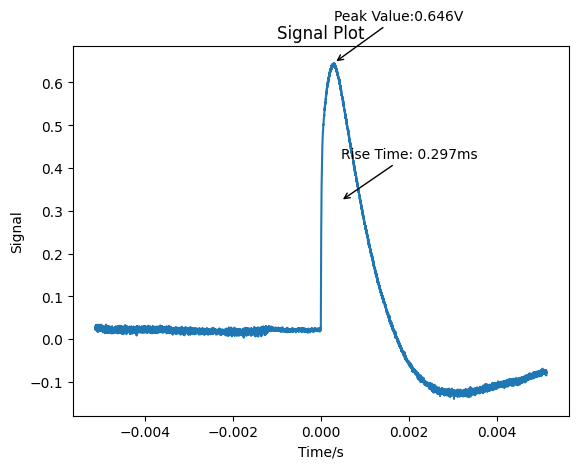

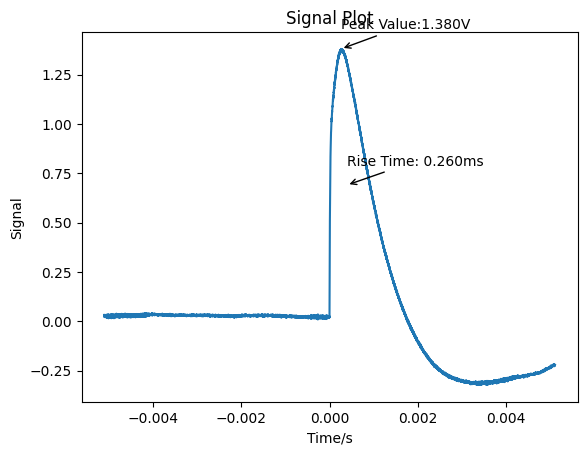

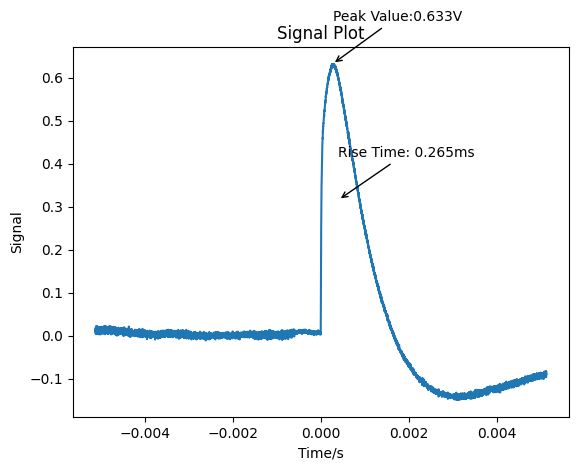

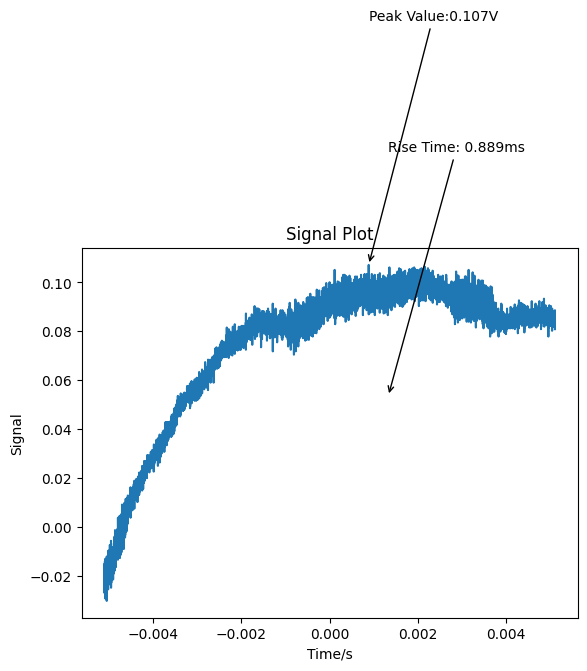

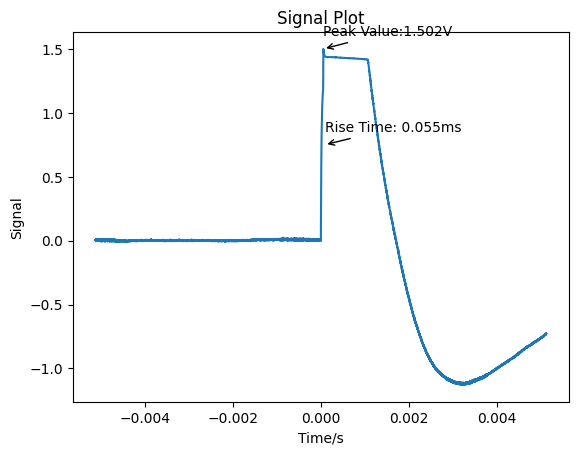

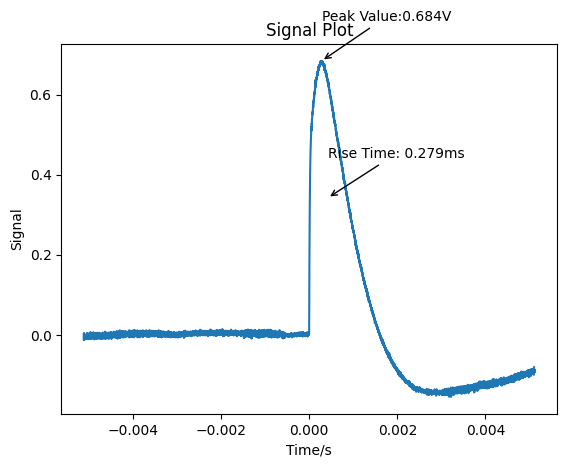

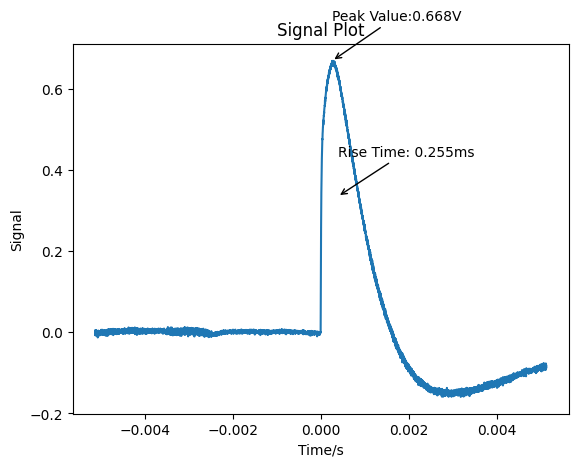

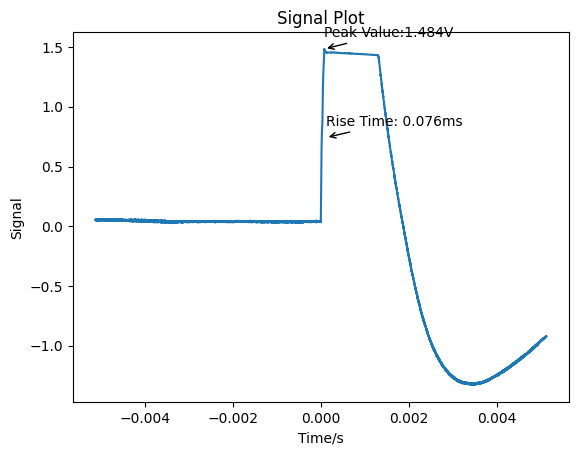

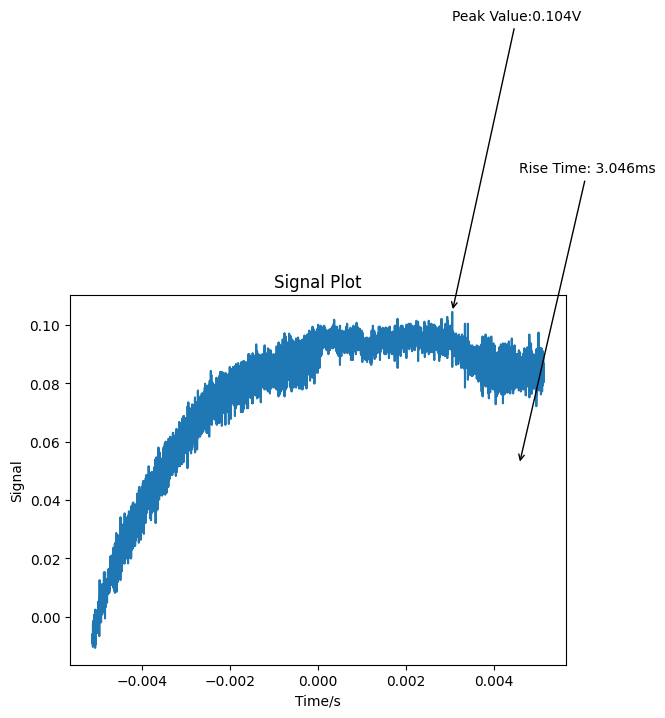

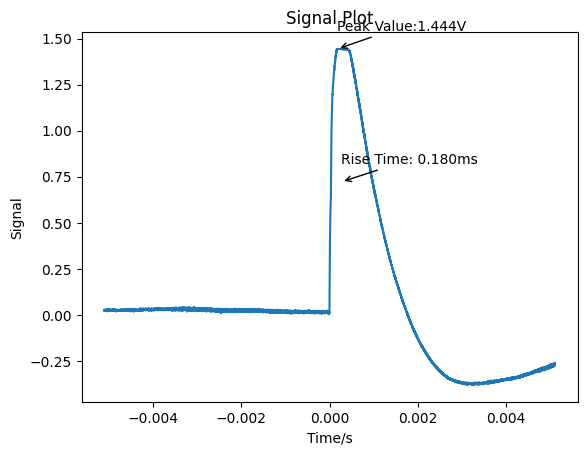

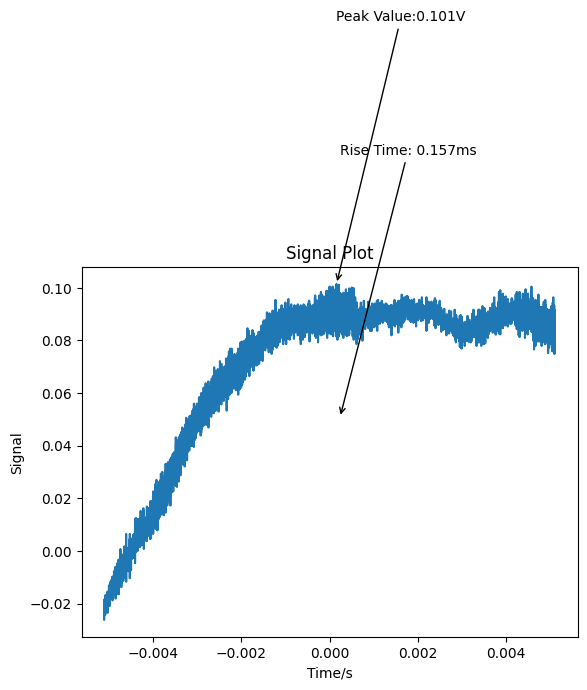

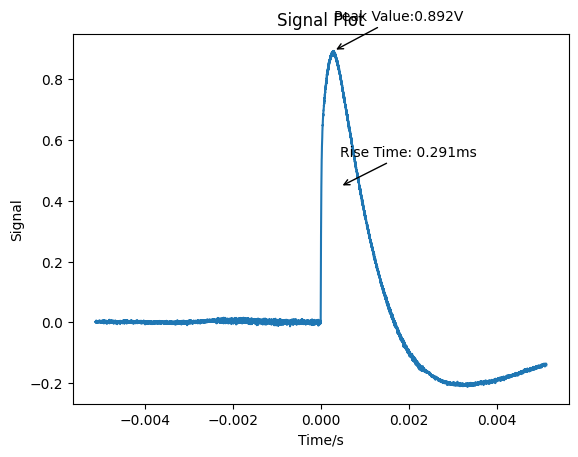

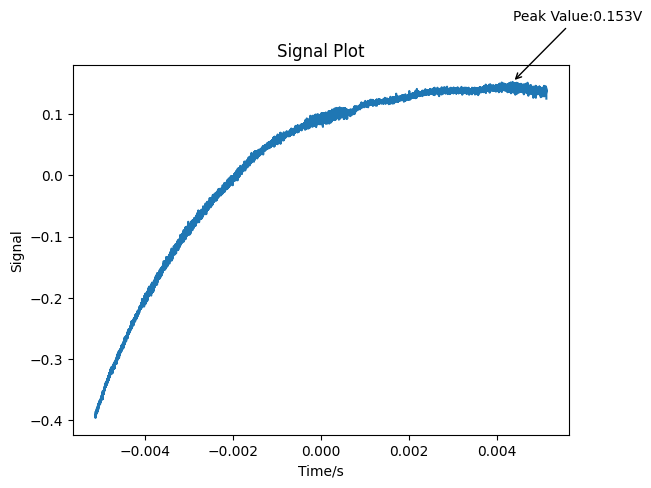

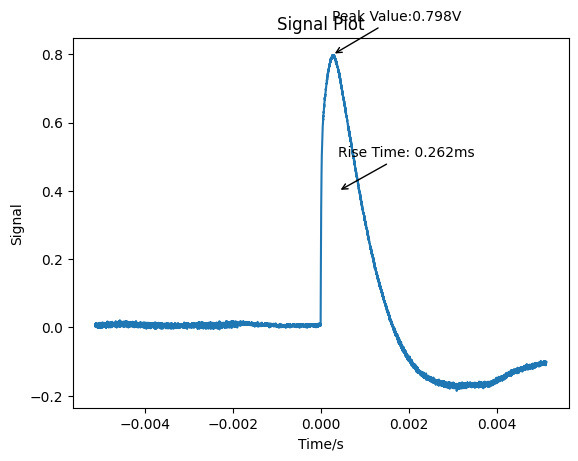

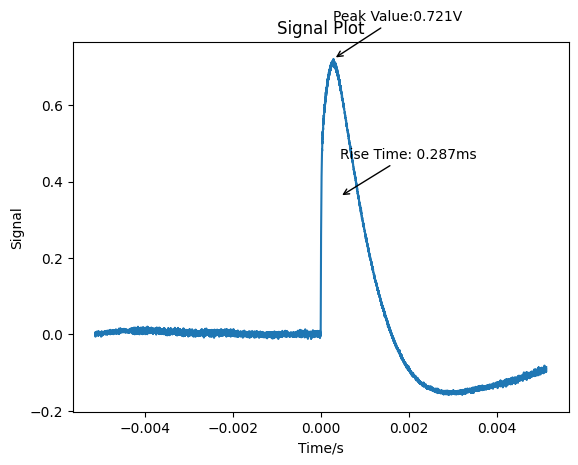

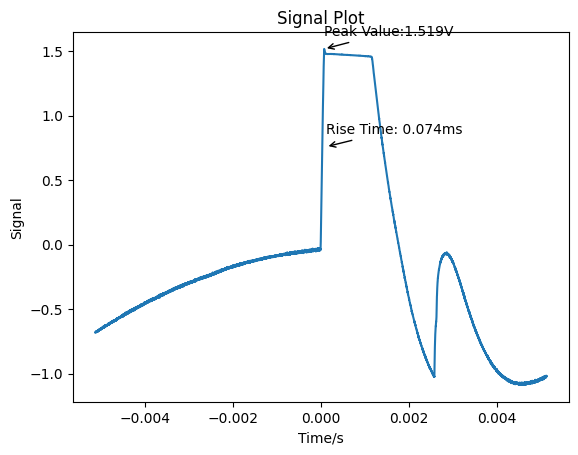

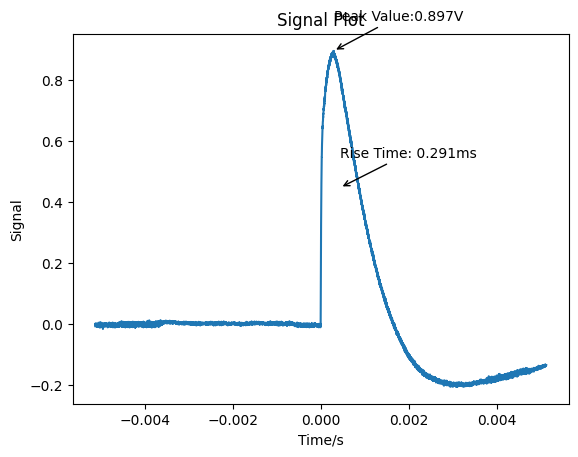

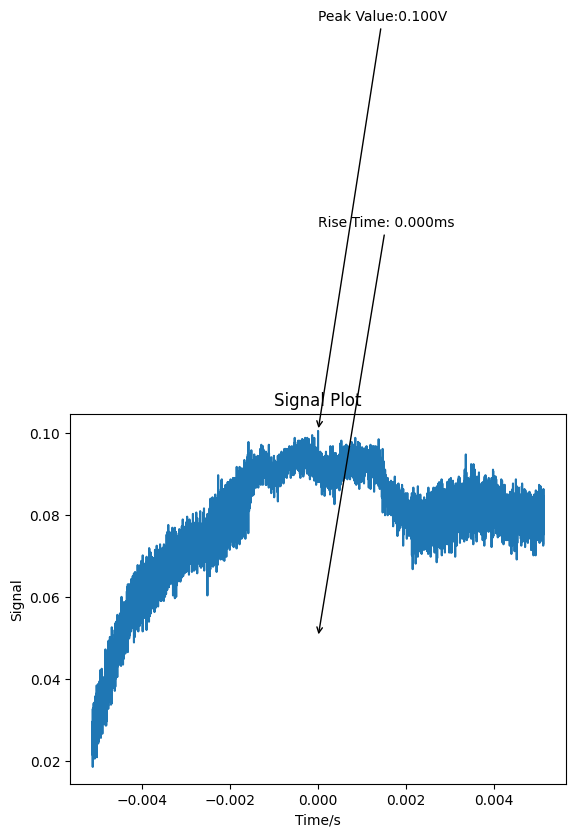

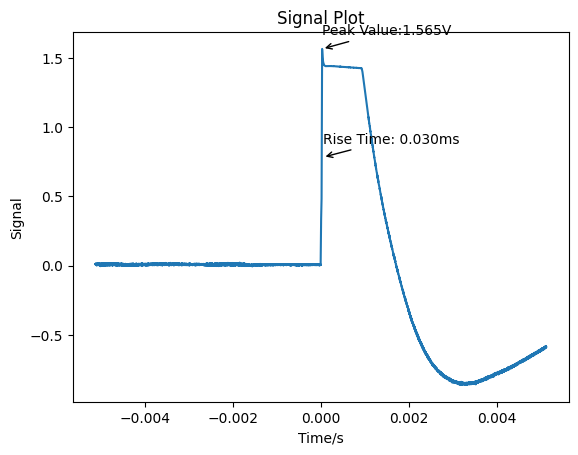

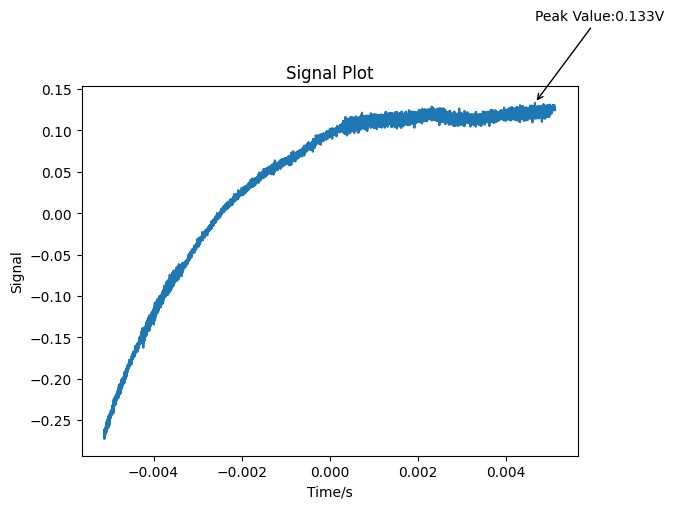

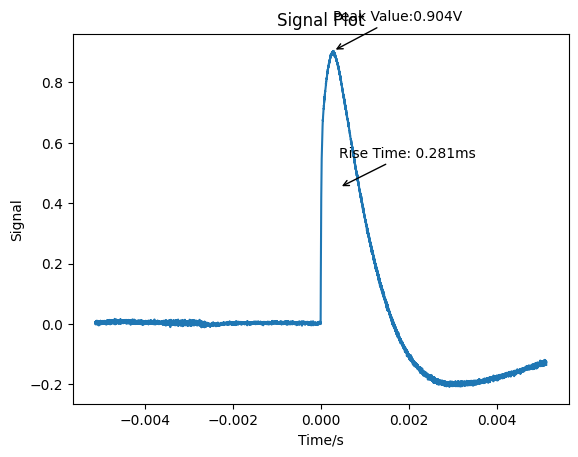

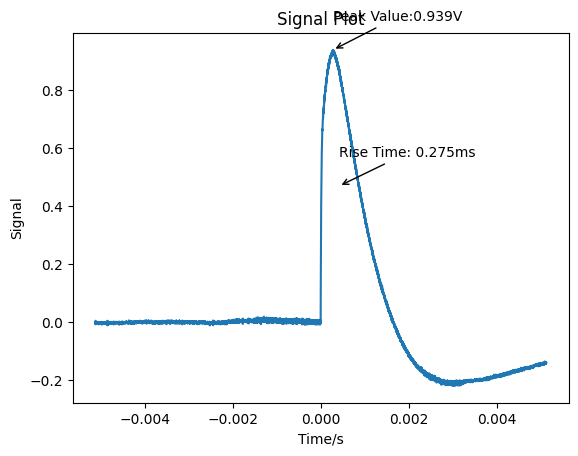

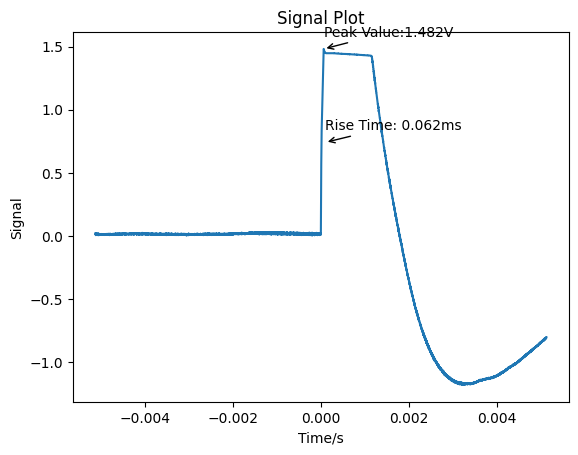

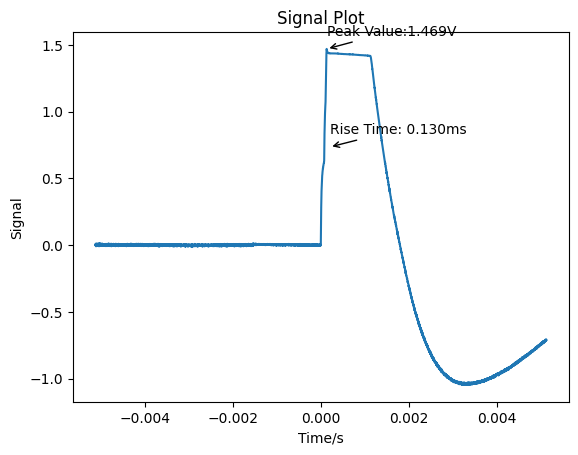

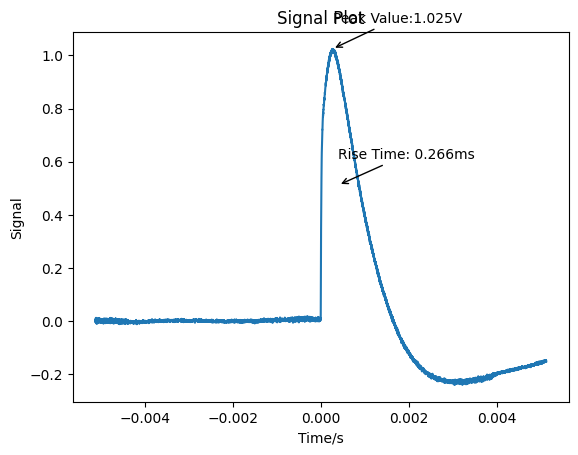

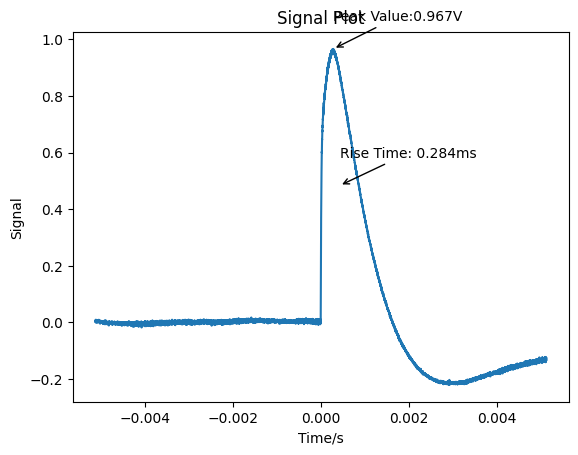

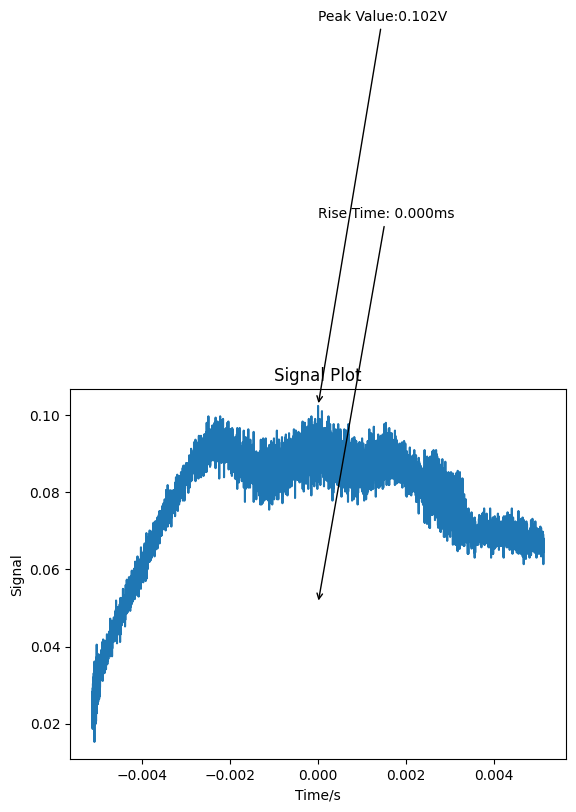

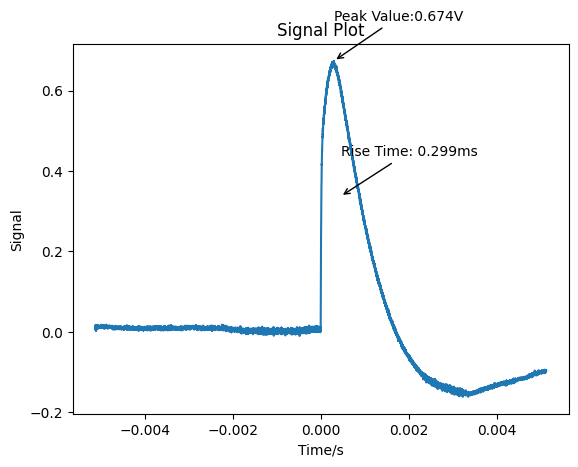

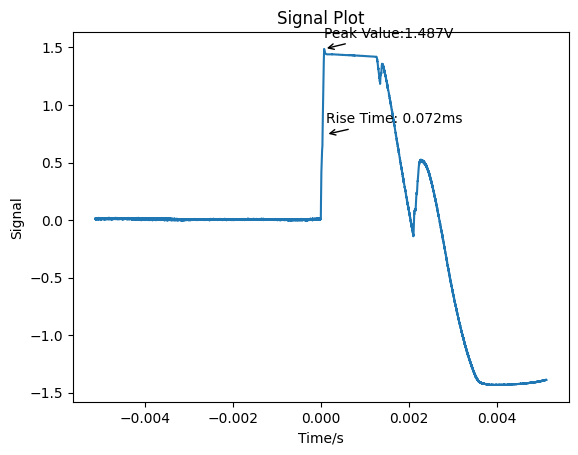

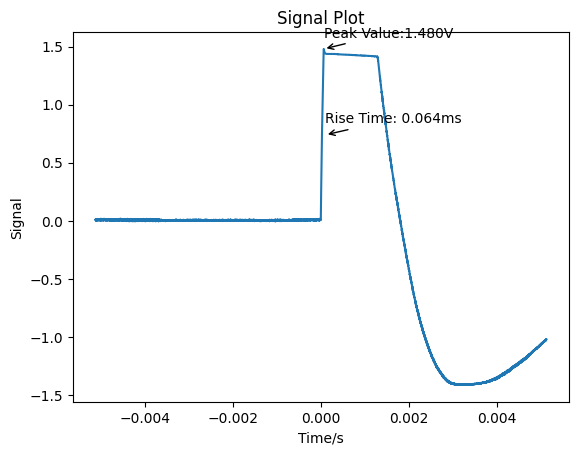

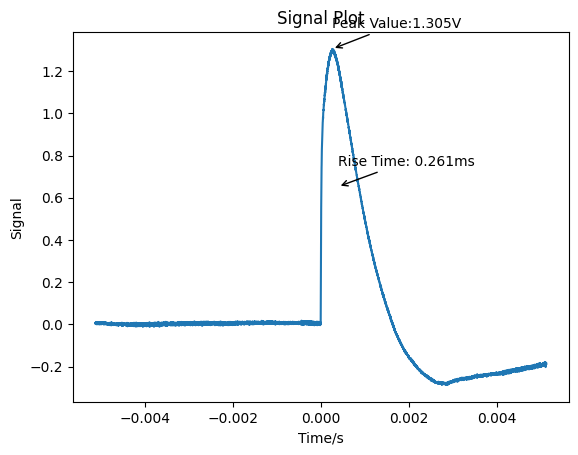

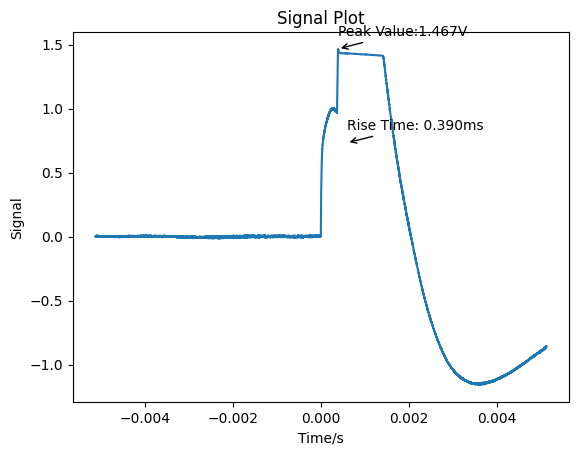

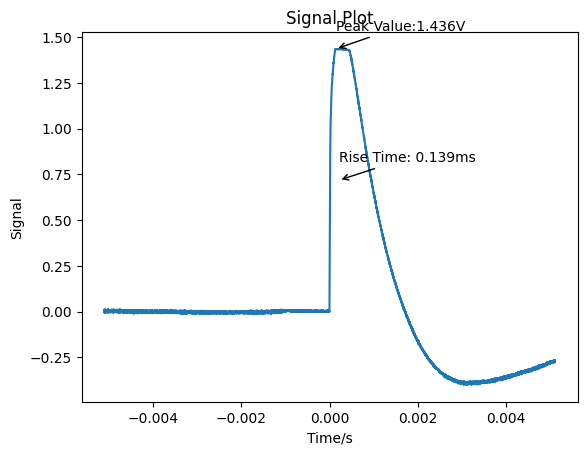

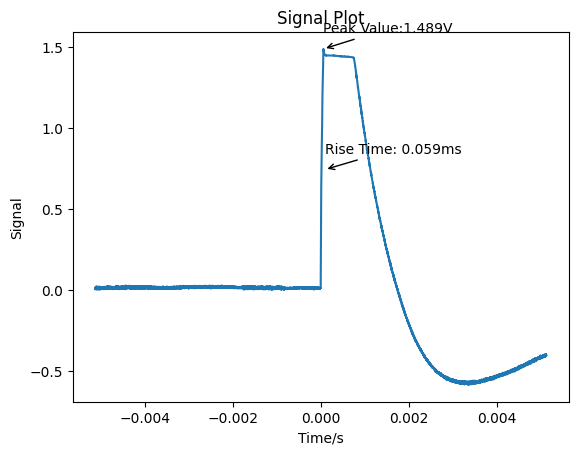

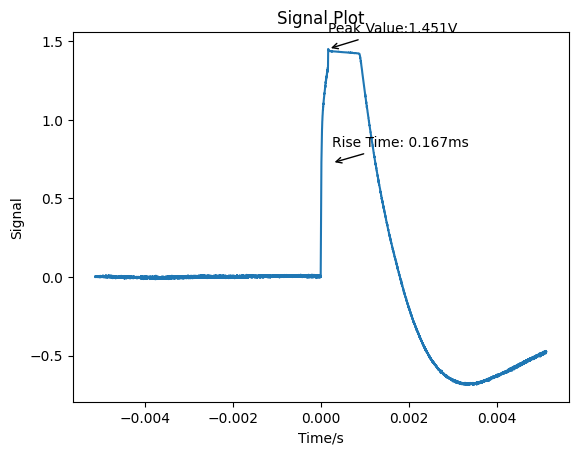

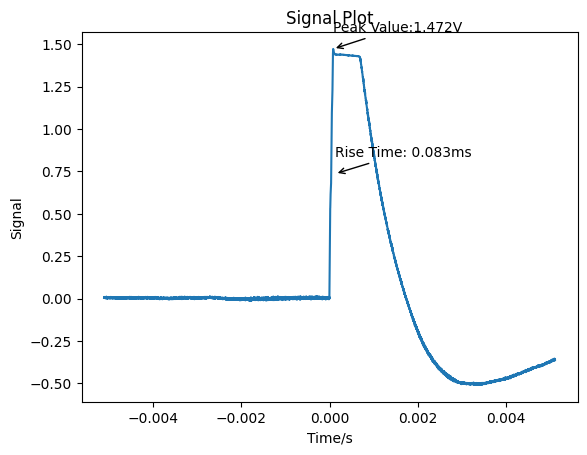

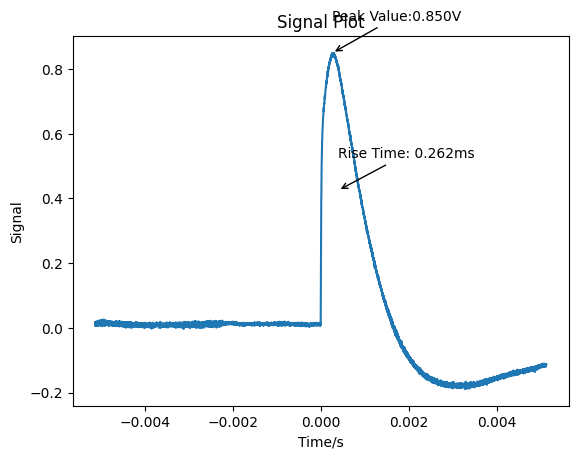

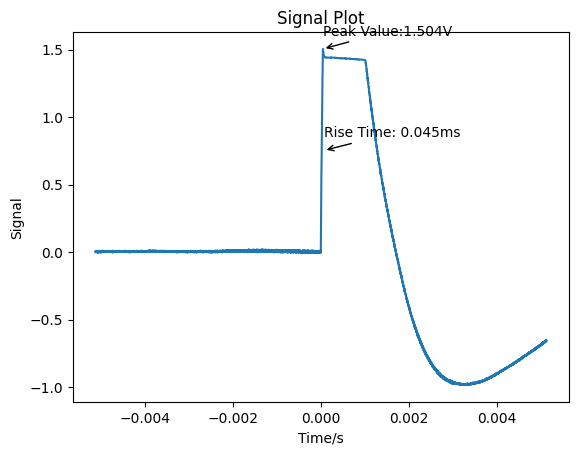

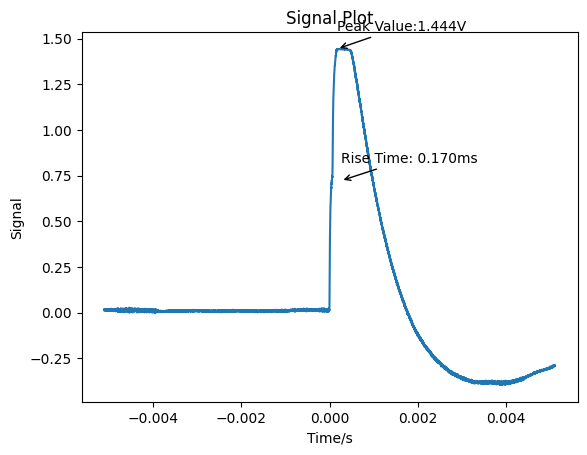

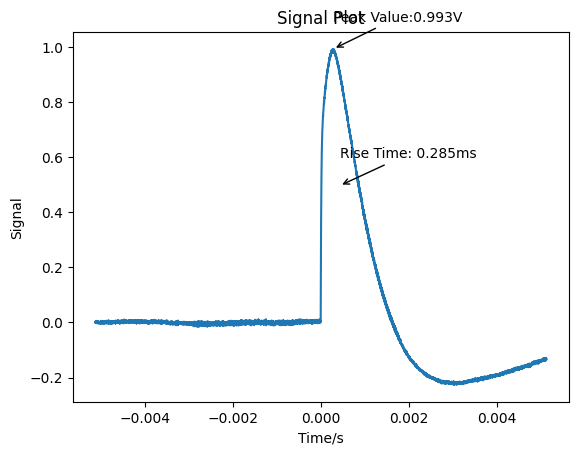

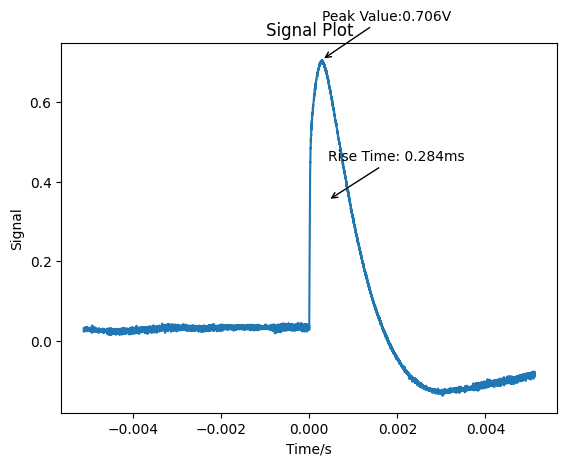

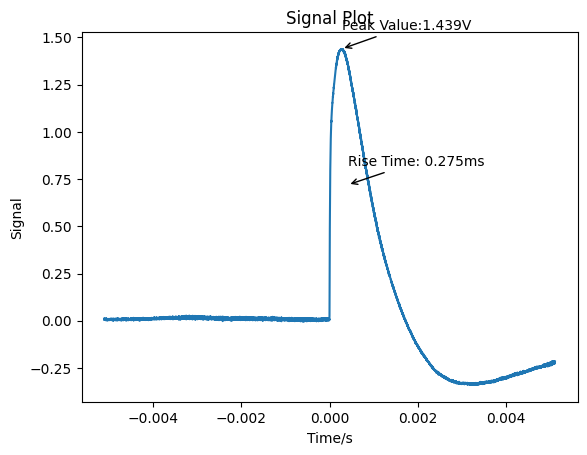

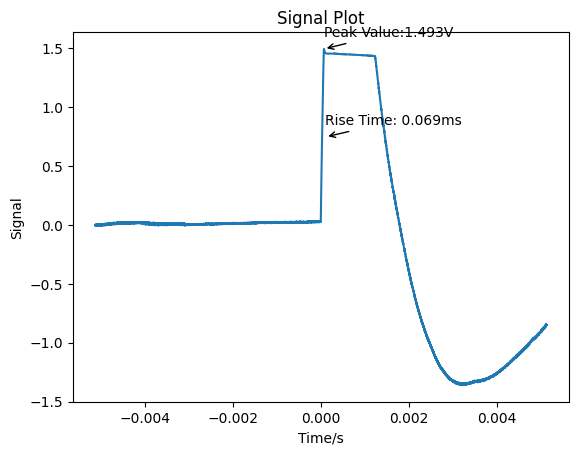

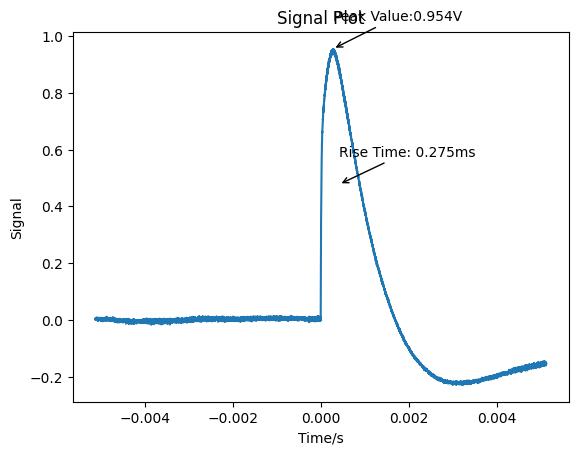

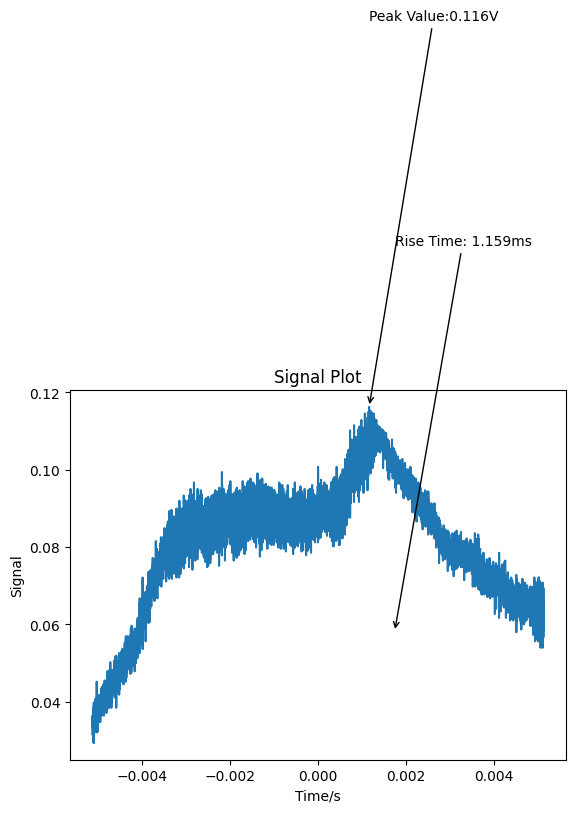

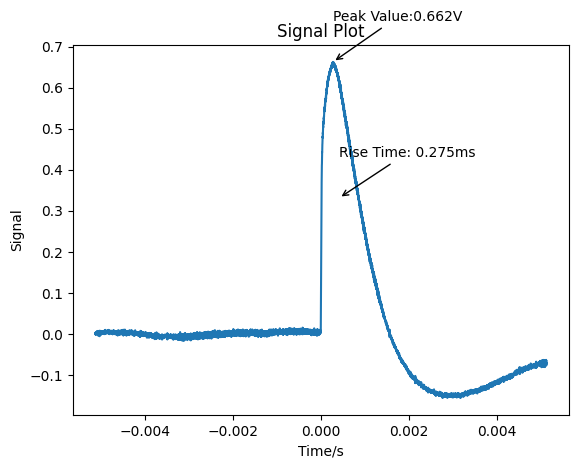

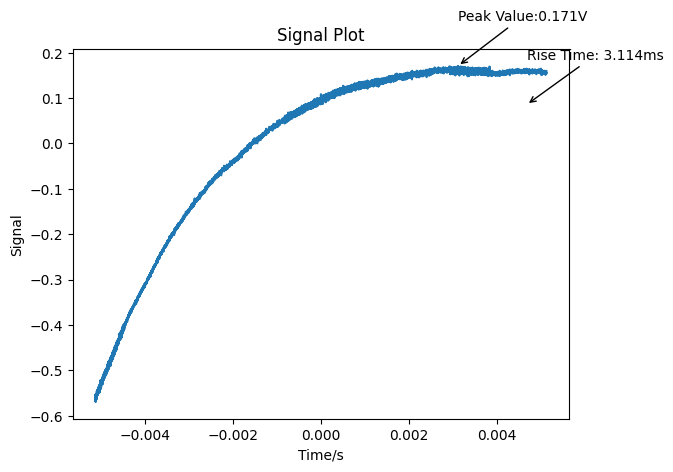

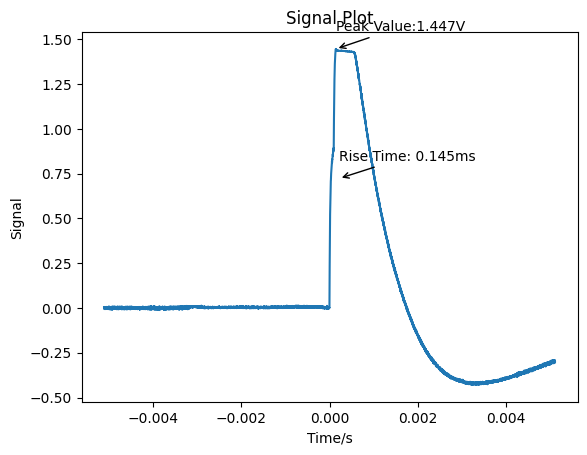

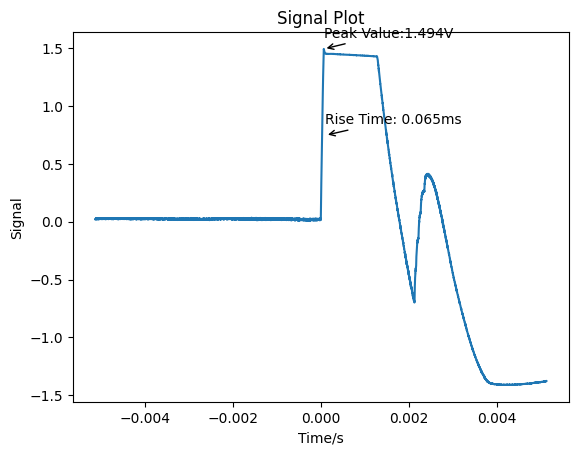

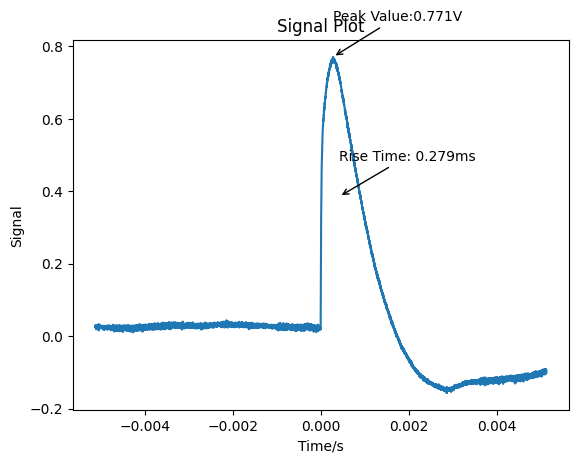

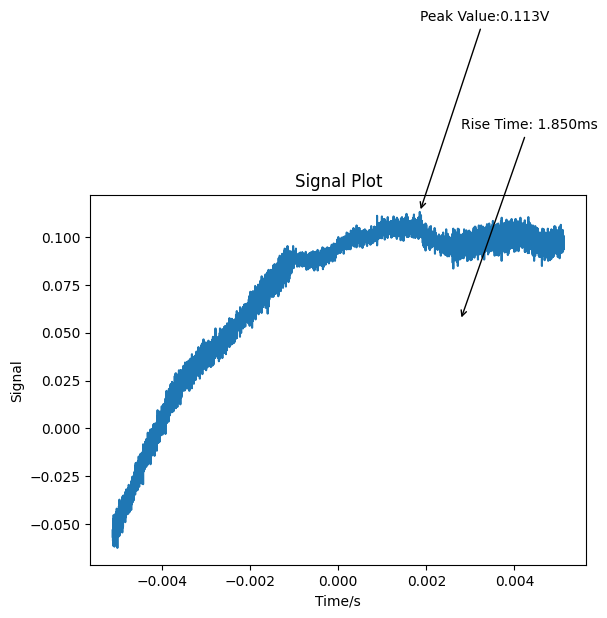

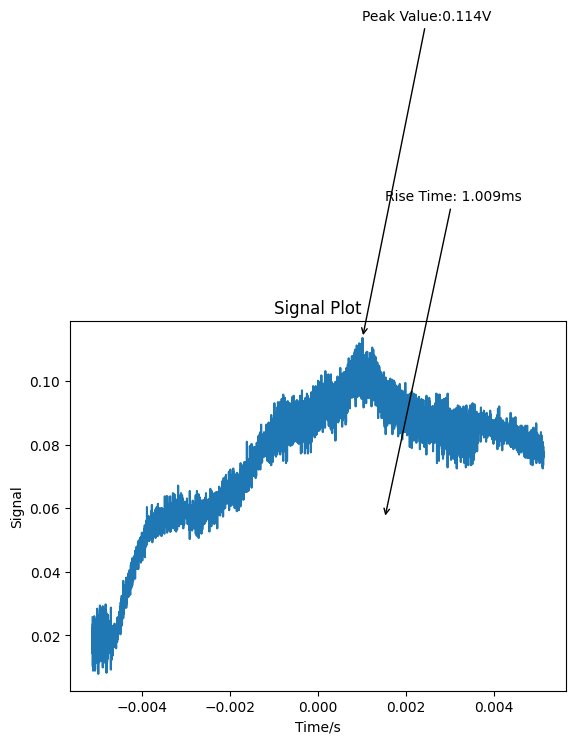

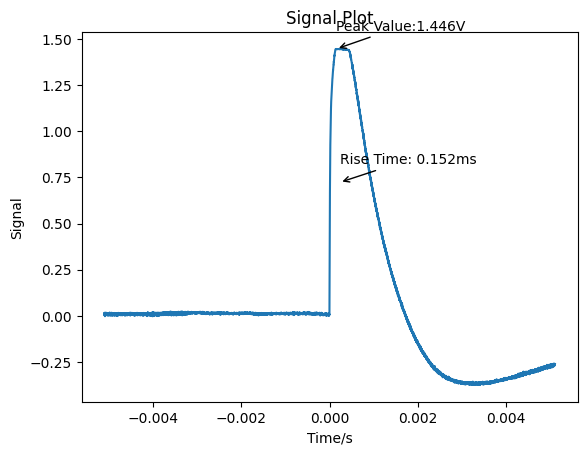

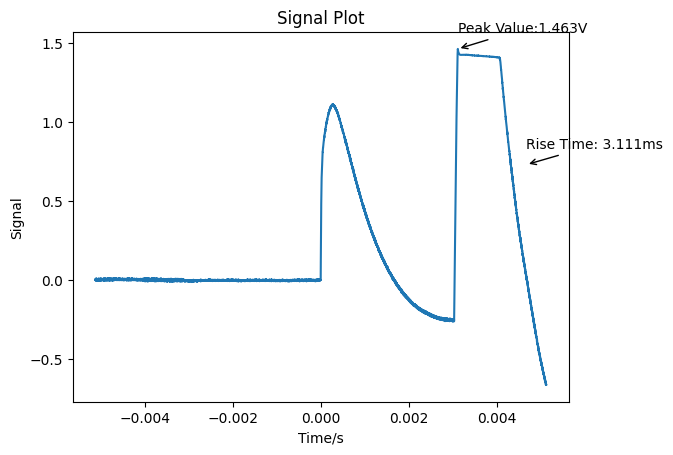

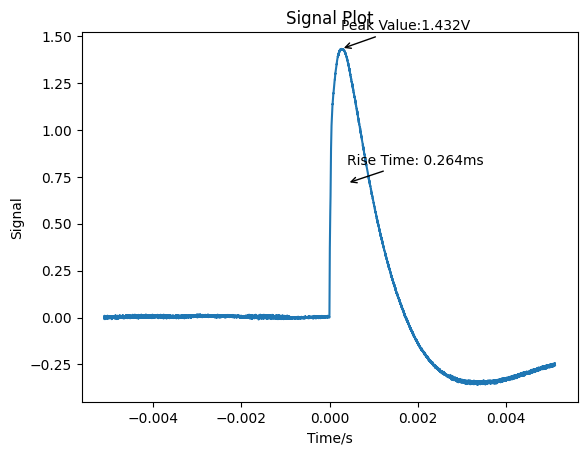

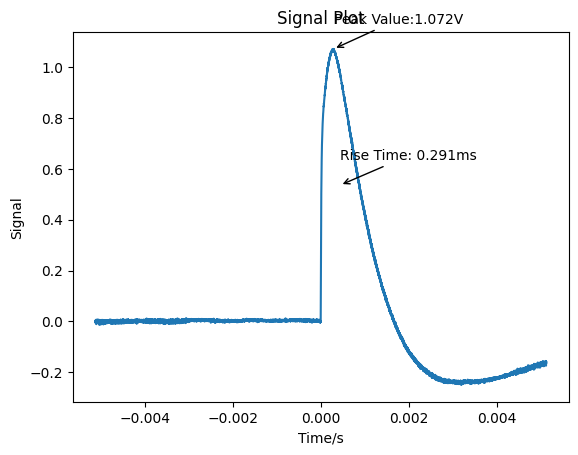

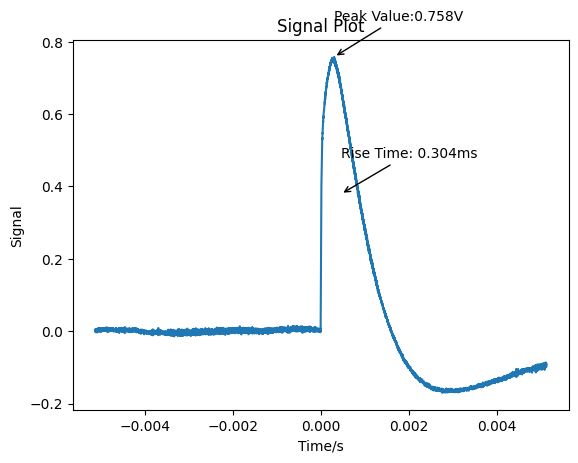

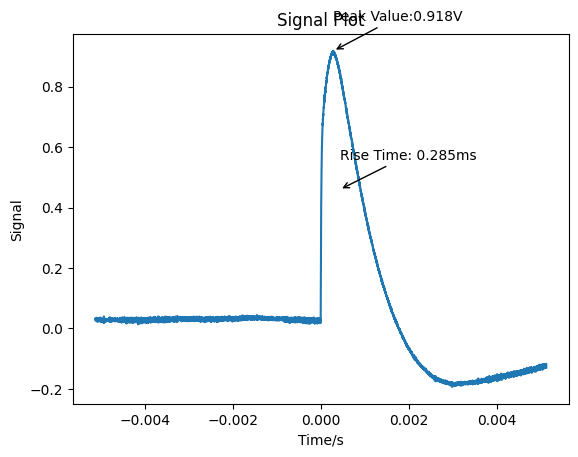

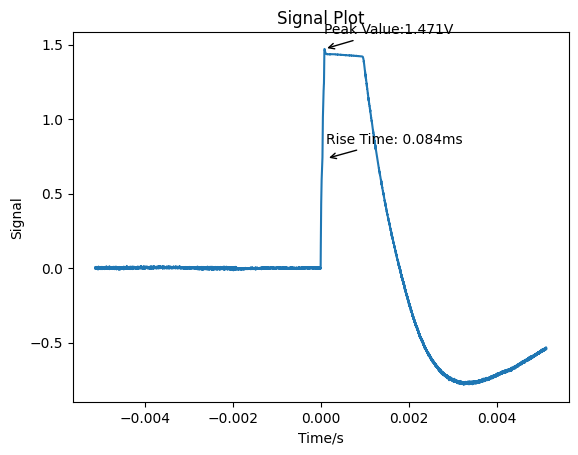

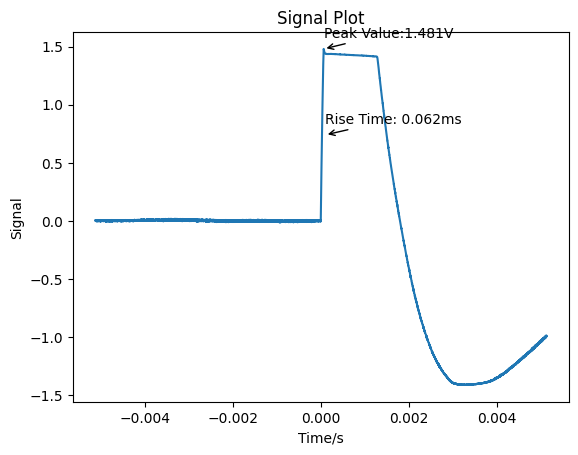

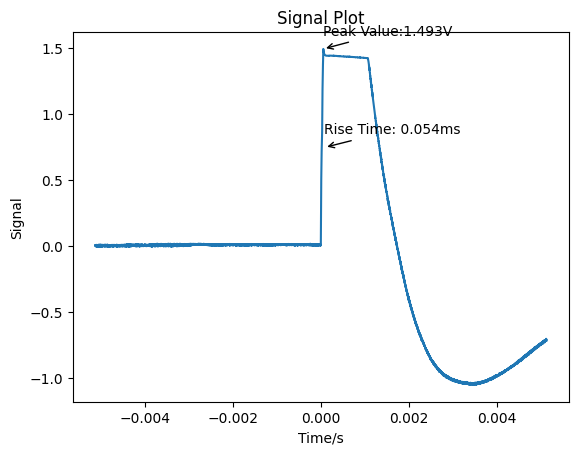

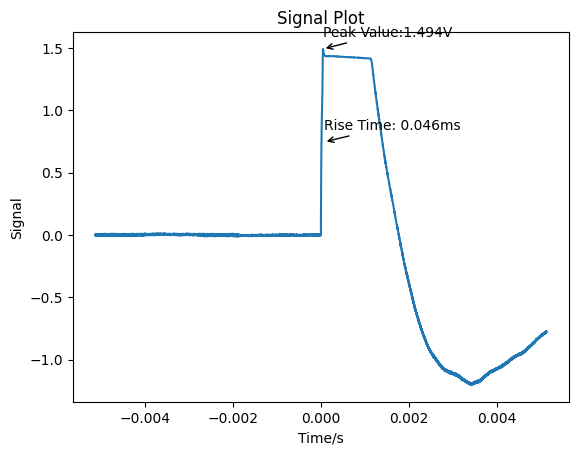

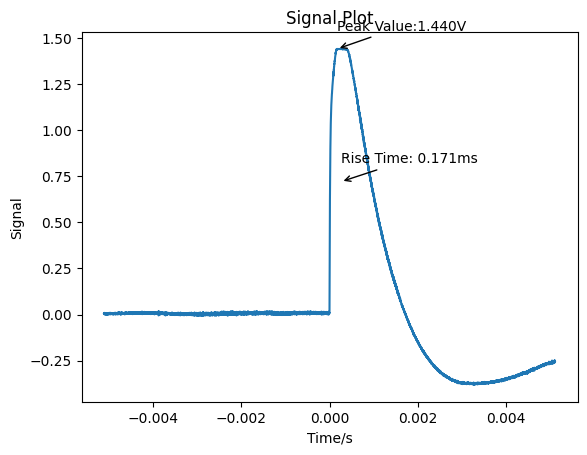

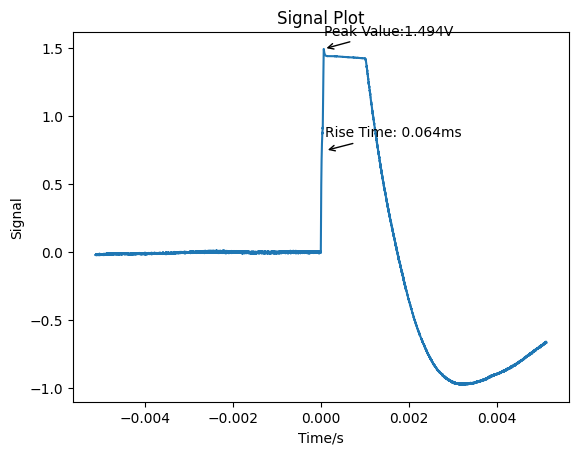

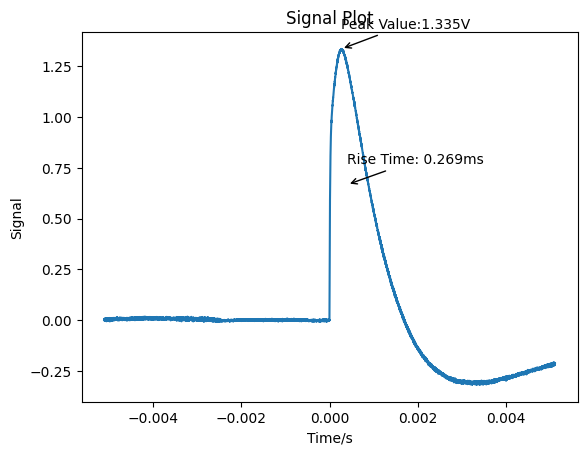

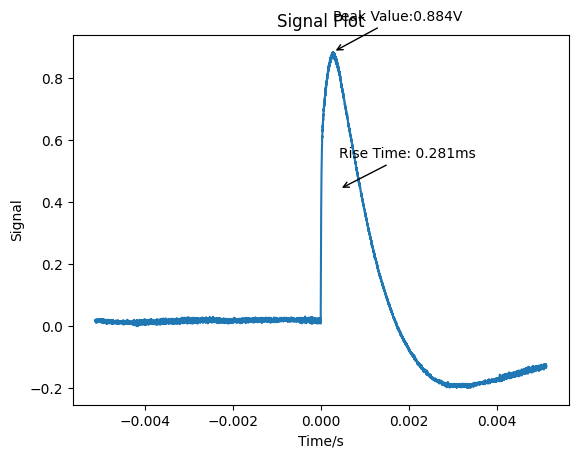

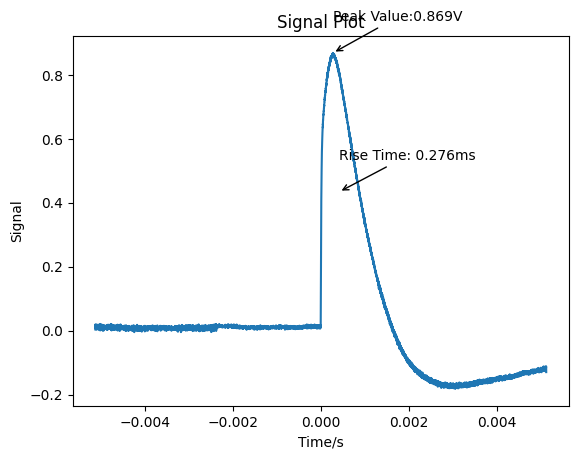

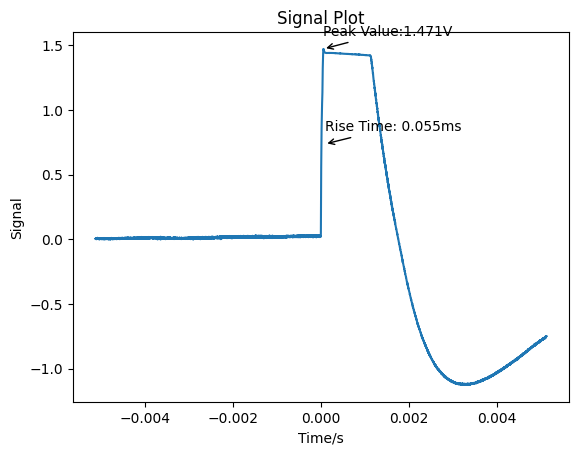

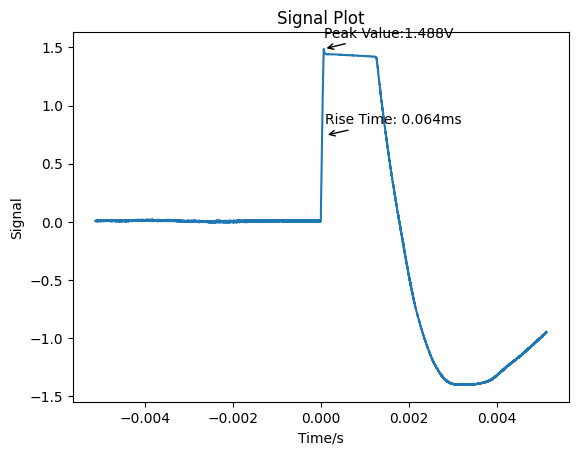

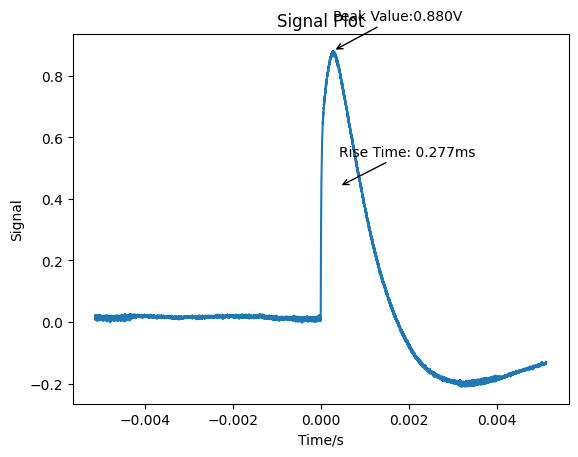

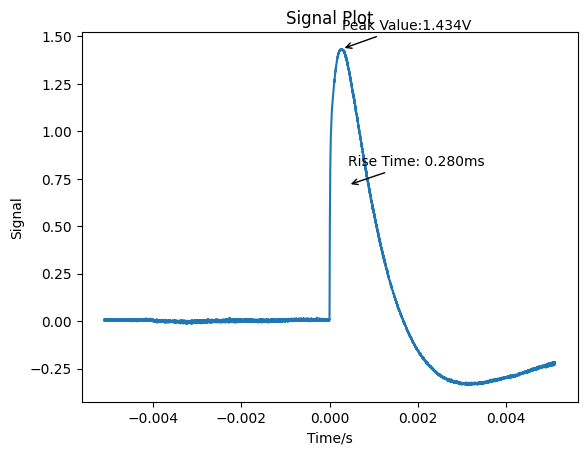

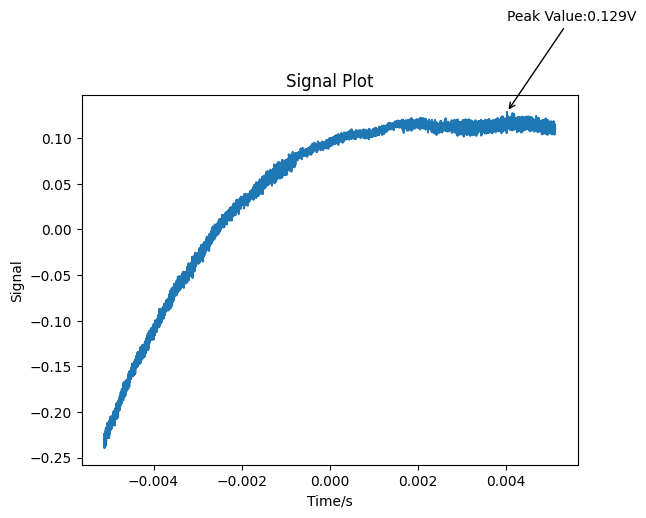

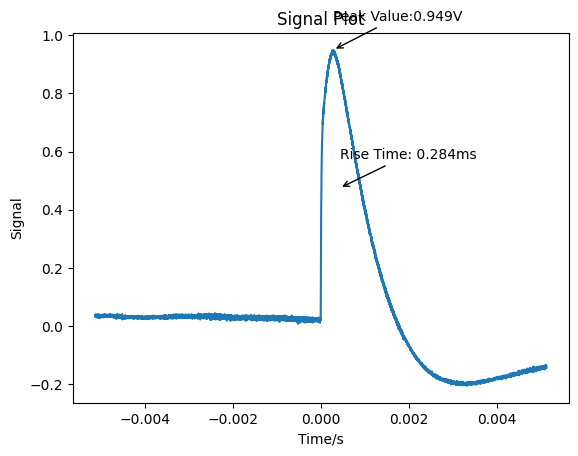

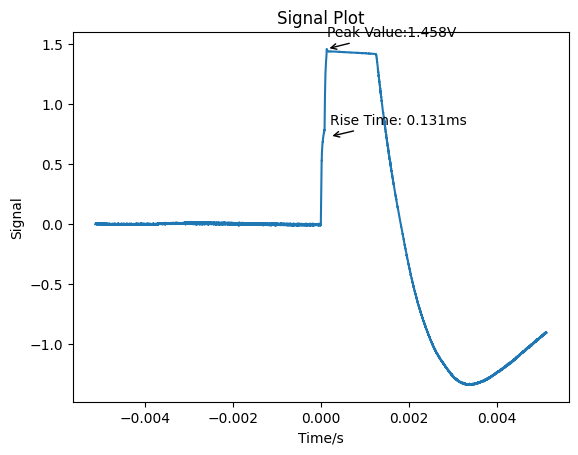

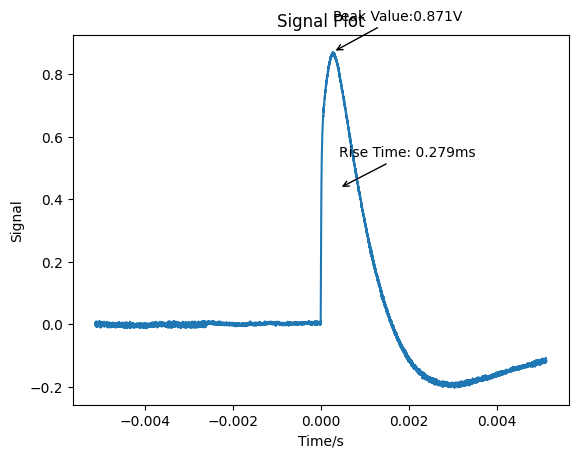

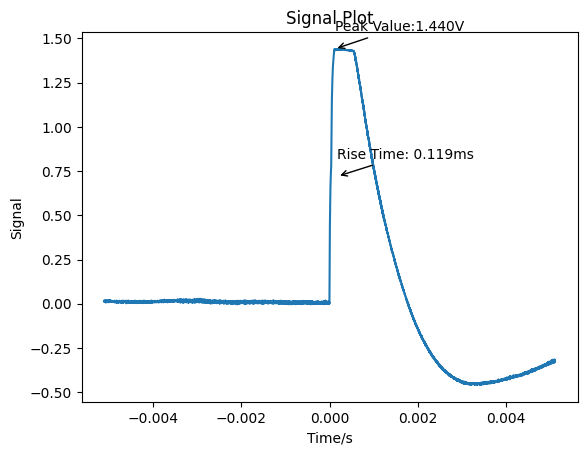

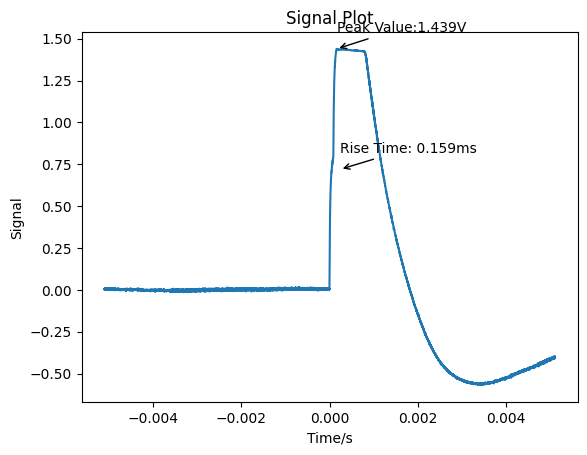

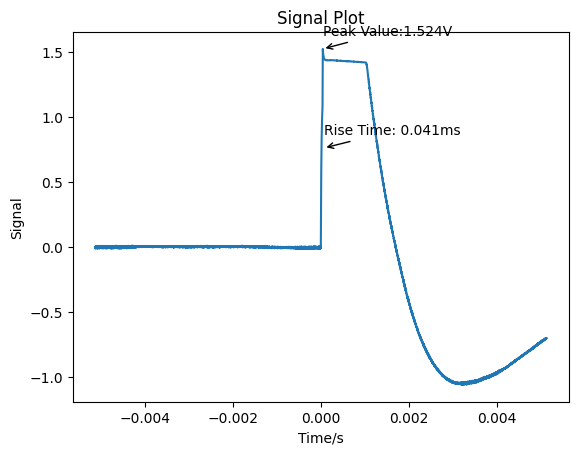

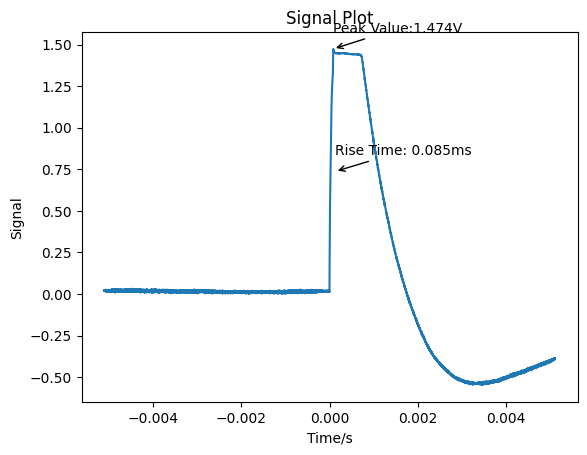

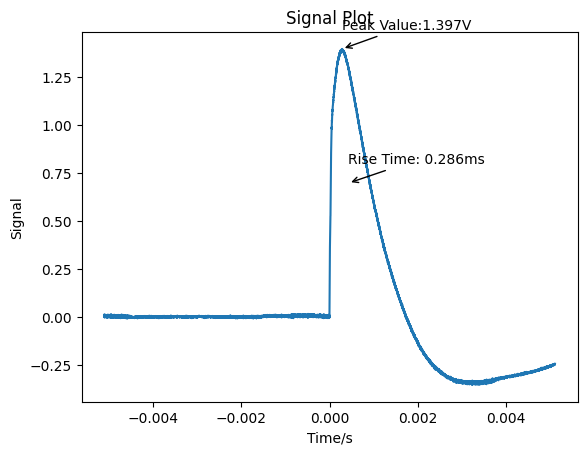

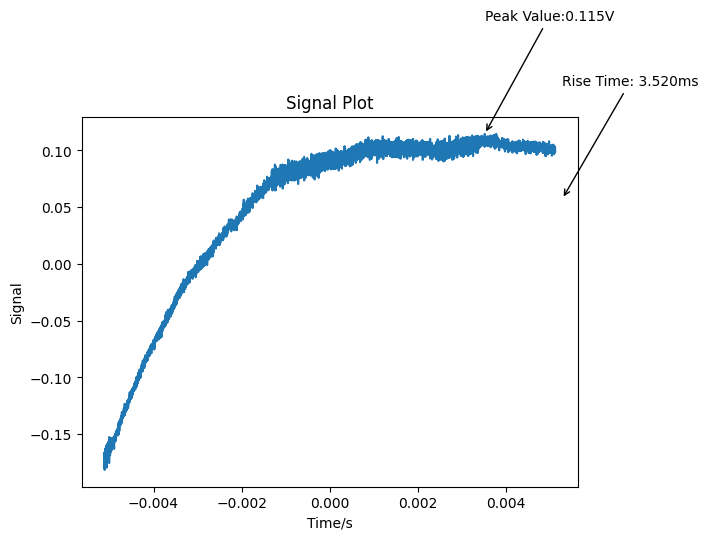

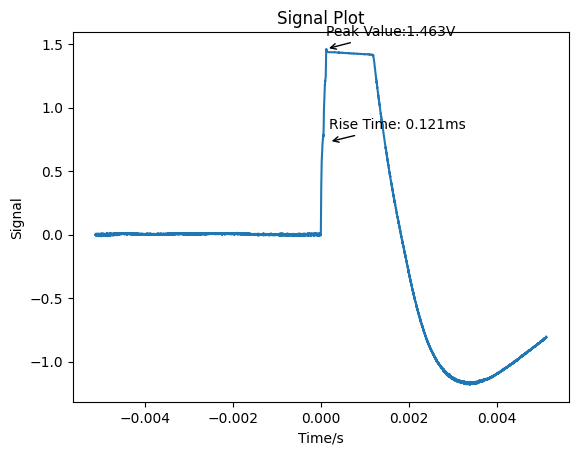

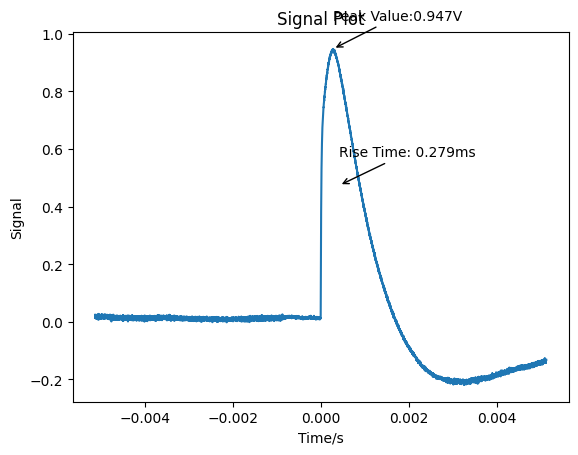

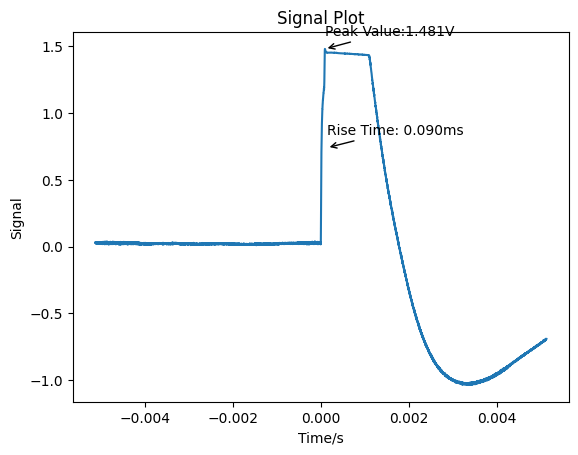

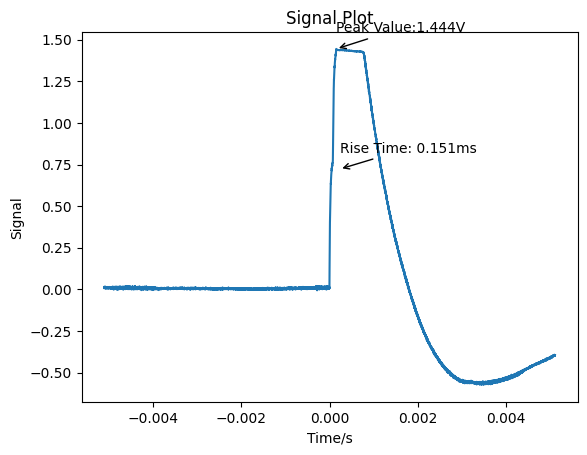

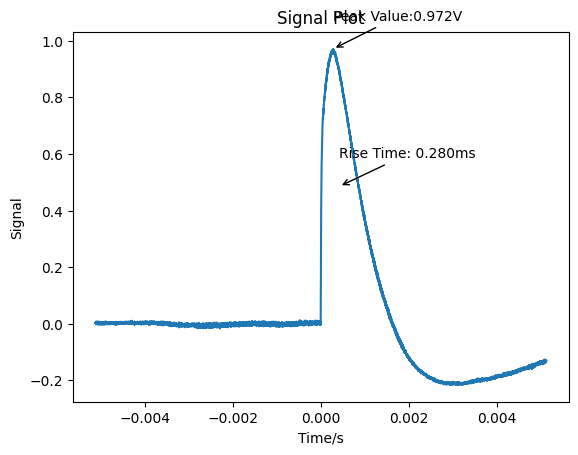

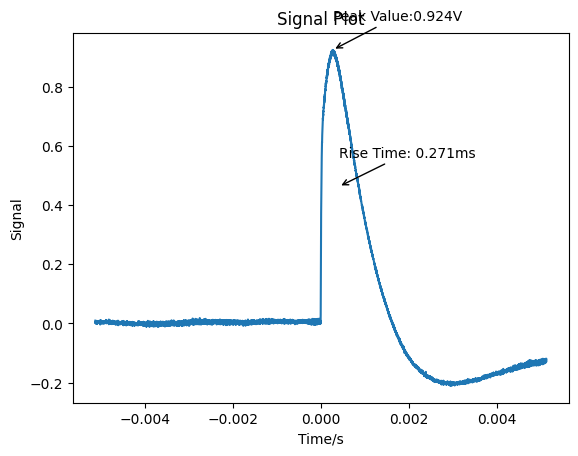

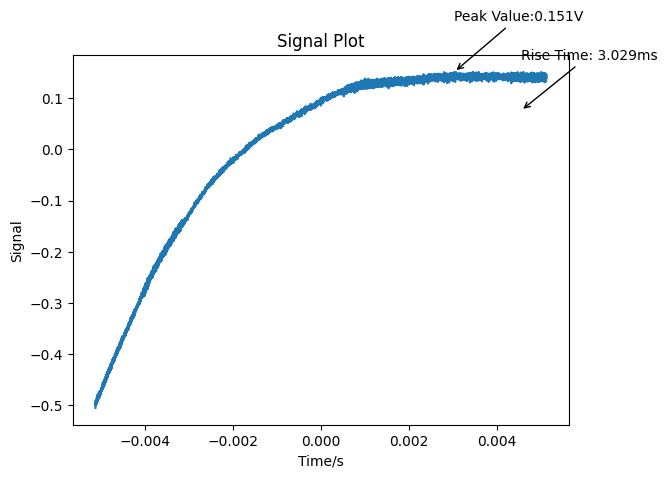

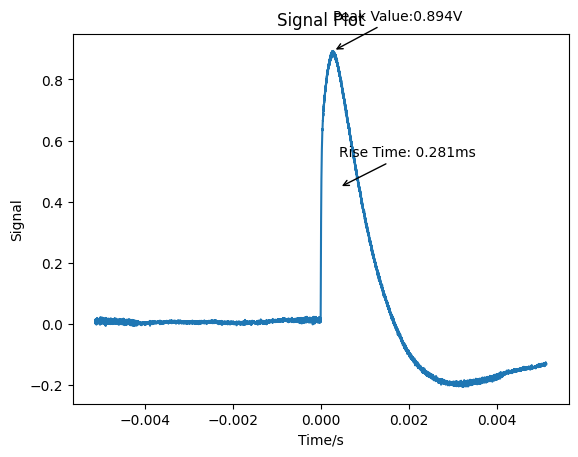

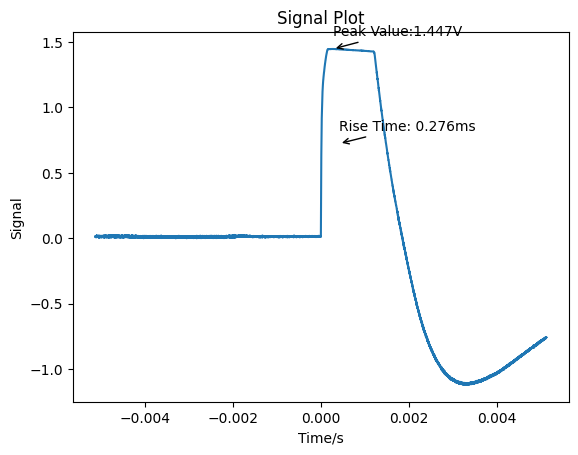

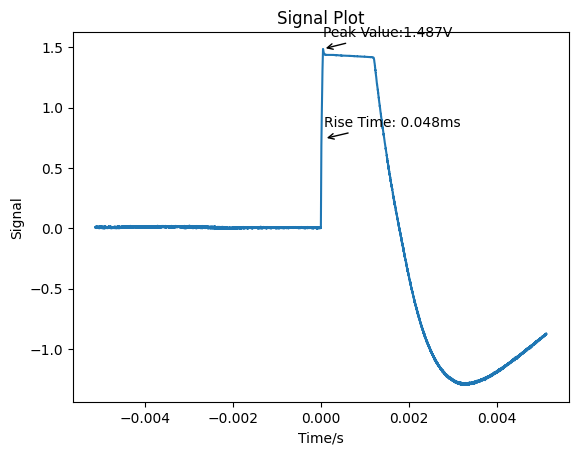

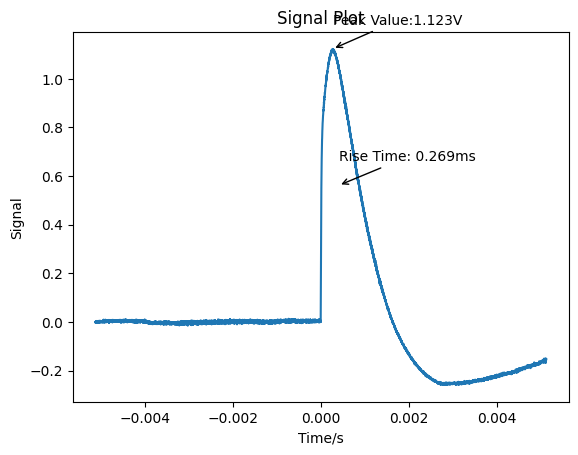

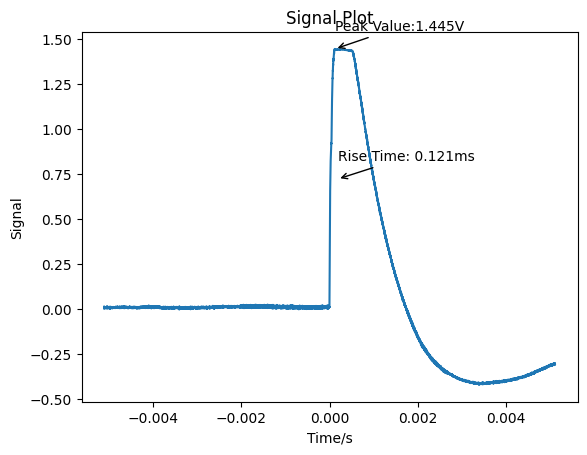

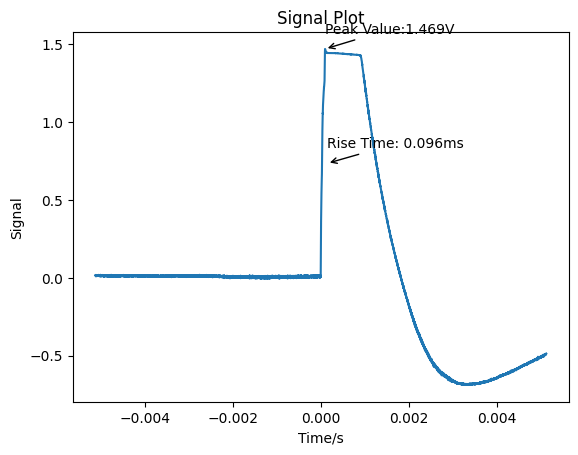

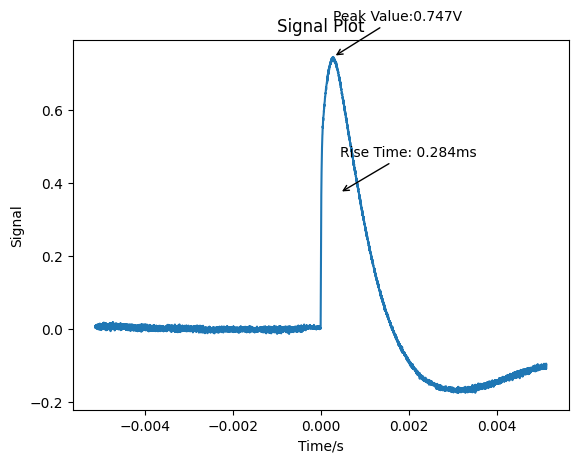

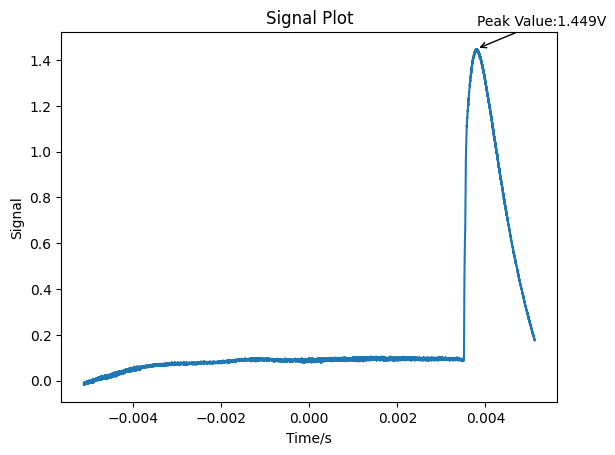

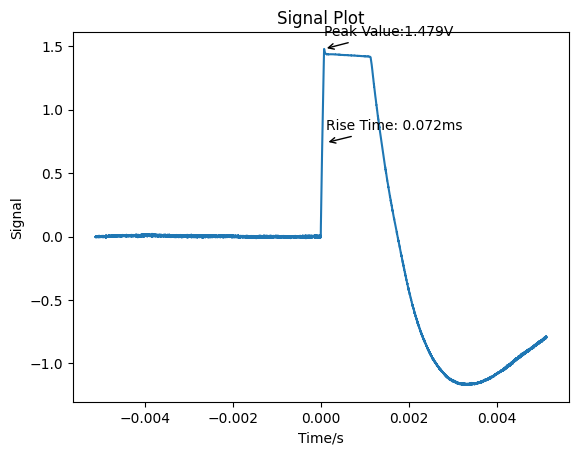

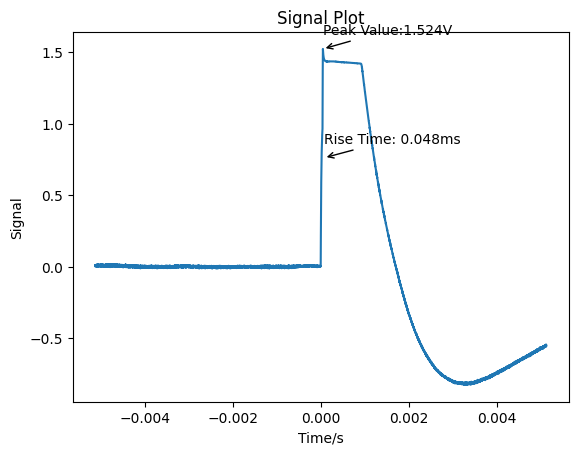

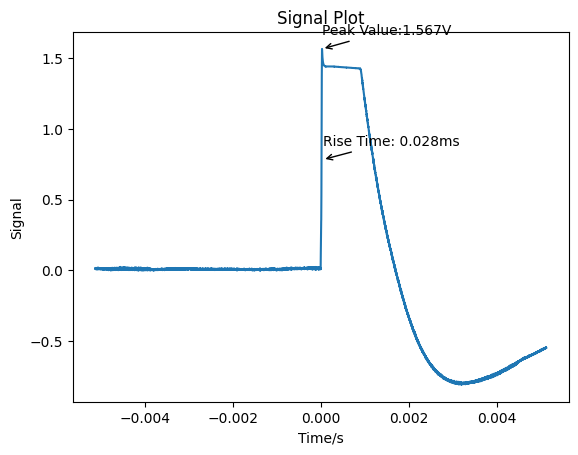

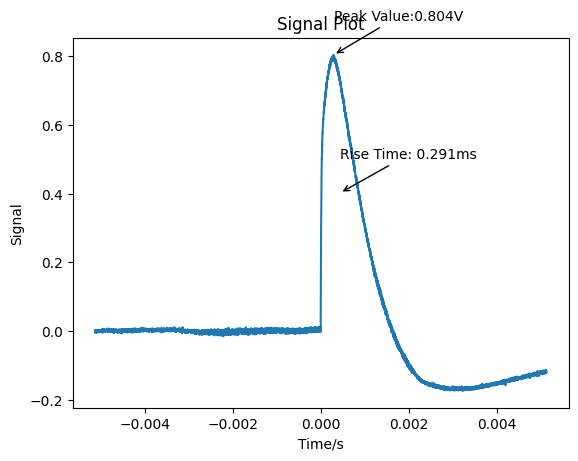

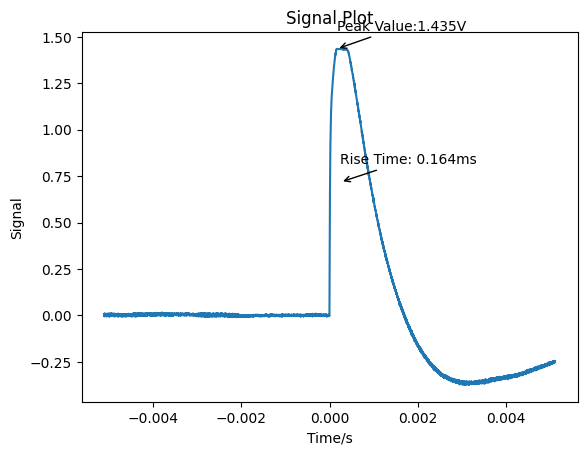

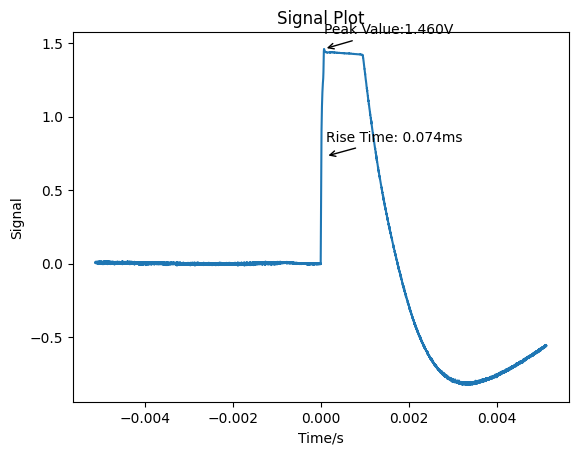

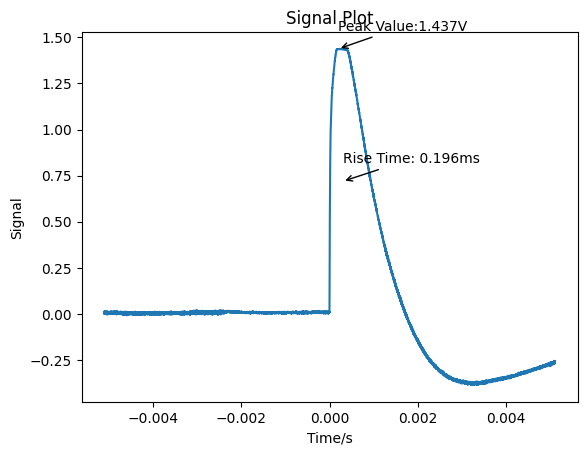

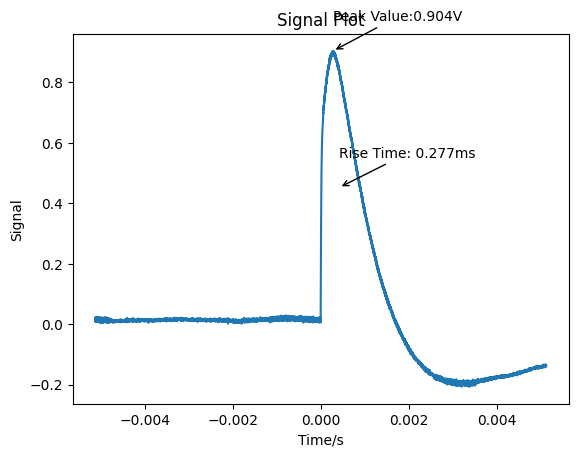

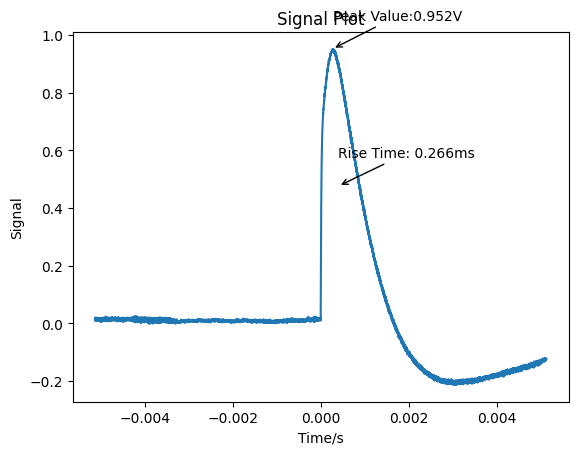

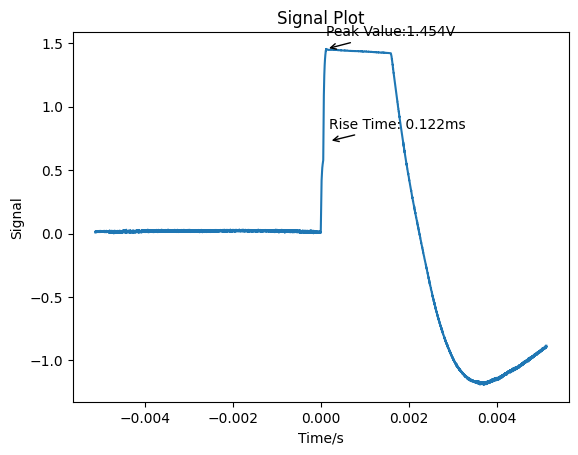

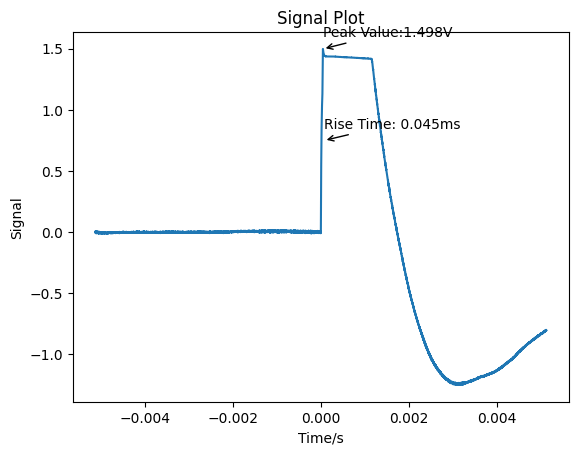

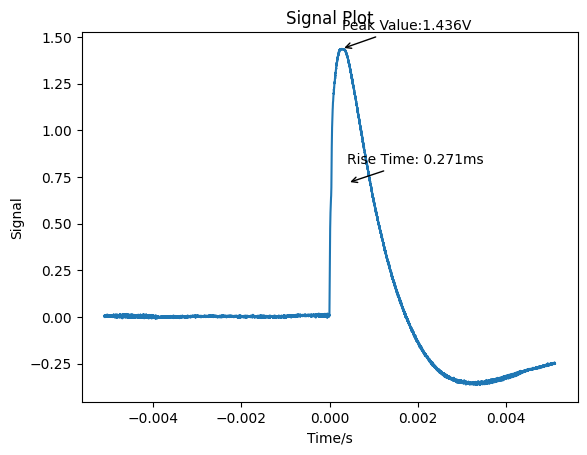

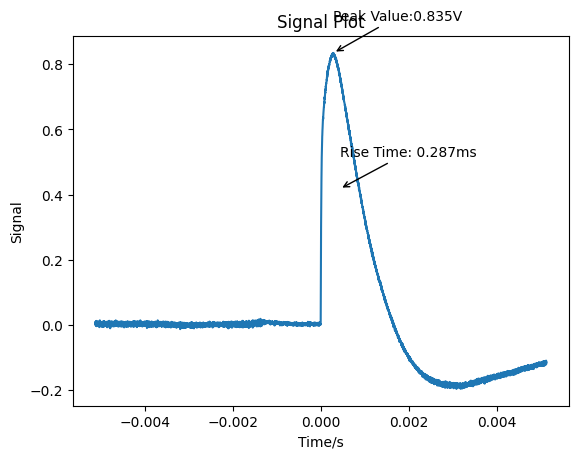

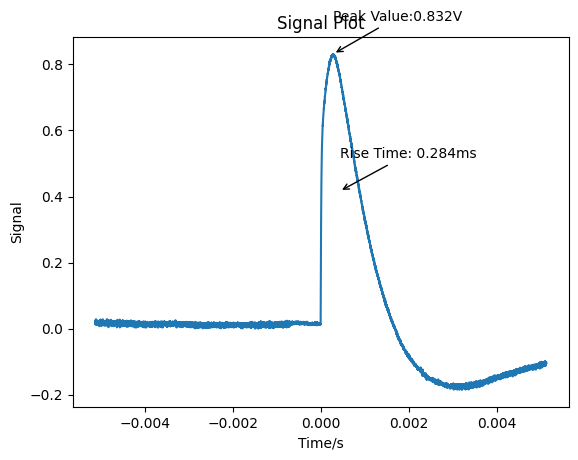

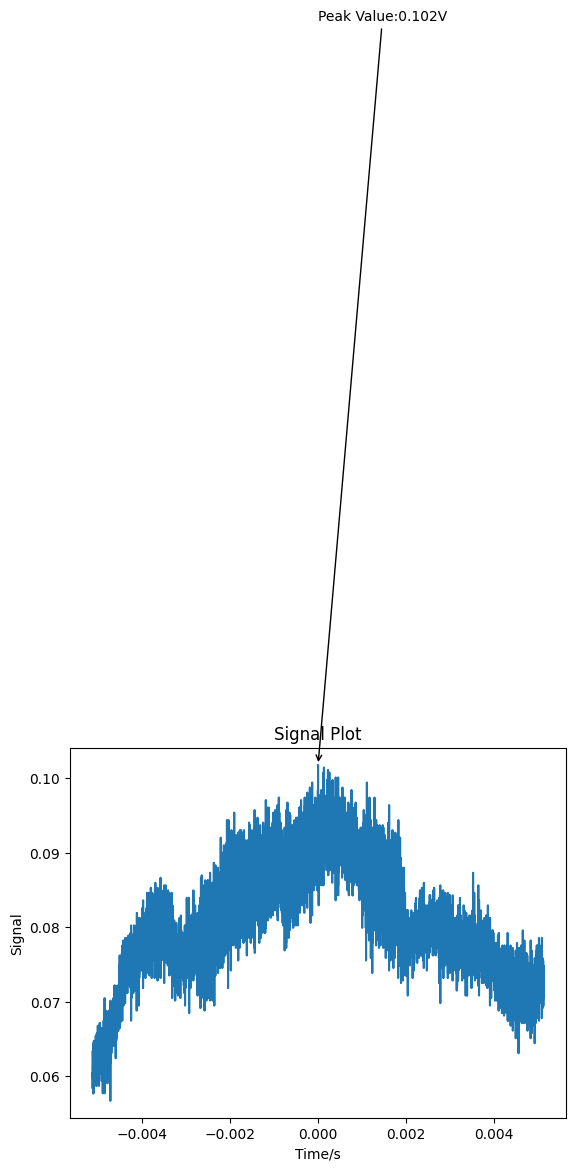

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_signal(signal_time, signal_data, trigger, MAKE_PLOT = True):
    # Find the peak value and rise time
    peak_value = signal_data.max()
    rise_time = 0.0
    for i in range(len(signal_data)):
        if signal_data[i] > trigger:
            rise_time = signal_time[signal_data.idxmax()] - signal_time[i]
            break
            
    # Plot the signal
    if MAKE_PLOT:
        plt.plot(signal_time, signal_data)
        plt.xlabel('Time/s')
        plt.ylabel('Signal')
        plt.title('Signal Plot')

        # Plot the peak value and rise time
        plt.annotate(f'Peak Value:{peak_value:.3f}V', xy=(signal_time.iloc[signal_data.idxmax()], peak_value),
                 xytext=(signal_time.iloc[signal_data.idxmax()], peak_value + 0.1),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
        plt.annotate(f'Rise Time: {rise_time * 1000:.3f}ms', xy=(signal_time.iloc[signal_data.idxmax()] + rise_time/2, peak_value/2),
                 xytext=(signal_time.iloc[signal_data.idxmax()] + rise_time/2, peak_value/2 + 0.1),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

        # Show the plot
        plt.show()

    # Return the peak value and rise time
    return peak_value, rise_time

trigger = 0.1

Peak_value = []
Rise_time = []
for i in range(int(combined_data.shape[1]/2)):
    peak_value, rise_time = plot_signal(combined_data[f'Event{i+1}_time'], combined_data[f'Event{i+1}_signal'], trigger, MAKE_PLOT = True)
    Peak_value.append(peak_value)
    Rise_time.append(rise_time)
    print(f'finish processing signal #{i+1}', end="\r")
    
plt.hist(Peak_value)